In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import glob
from sklearn.preprocessing import LabelEncoder
from matplotlib import rcParams
from scipy import stats
import openpyxl

In [2]:
# get data file names
path =r'.'
filenames = glob.glob(path + "/data/LoanStats_securev1_2019Q1.csv.zip")

In [3]:
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename,skiprows=1,low_memory=False))
# Concatenate all data into one DataFrame
big_frame = pd.concat(dfs, ignore_index=True)    

In [2]:
# read input csv zip files
path =r'.'
dfs = []
filenames = glob.glob(path + "/data/*.zip")
print(filenames)
for zipFileName in filenames:
    print(zipFileName)
    try:
        df = pd.read_csv(zipFileName,skiprows=1,low_memory=False)
        print("records count for file ", zipFileName, " = ",df.shape[0])
        dfs.append(df) 
        # Concatenate all data into one DataFrame
        big_frame = pd.concat(dfs, ignore_index=True)
    except KeyError:
        print ('ERROR: not able to read  %s  zip file',zipFileName)
    else:
        print ('able to read  %s  zip file',zipFileName)    

print("Reading, Extracting input zip files done...")

['./data_final/LoanStats_securev1_2018Q4.csv.zip', './data_final/LoanStats_securev1_2017Q4.csv.zip', './data_final/LoanStats_securev1_2017Q3.csv.zip', './data_final/LoanStats_securev1_2016Q3.csv.zip', './data_final/LoanStats_securev1_2020Q1.csv.zip', './data_final/LoanStats_securev1_2019Q2.csv.zip', './data_final/LoanStats_securev1_2016Q1.csv.zip', './data_final/LoanStats_securev1_2019Q1.csv.zip', './data_final/LoanStats_securev1_2016Q4.csv.zip', './data_final/LoanStats_securev1_2019Q4.csv.zip', './data_final/LoanStats_securev1_2017Q2.csv.zip', './data_final/LoanStats_securev1_2019Q3.csv.zip', './data_final/LoanStats_securev1_2016Q2.csv.zip', './data_final/LoanStats_securev1_2018Q2.csv.zip', './data_final/LoanStats_securev1_2017Q1.csv.zip', './data_final/LoanStats_securev1_2018Q1.csv.zip', './data_final/LoanStats_securev1_2018Q3.csv.zip']
./data_final/LoanStats_securev1_2018Q4.csv.zip
records count for file  ./data_final/LoanStats_securev1_2018Q4.csv.zip  =  128414
able to read  %s  zi

In [4]:

print("total_records in input raw data frame",big_frame['id'].count())
big_frame.head()

total_records in input raw data frame 115575


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,148406308,NaN,12000.0,12000.0,12000.0,60 months,16.40%,294.38,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,148501522,NaN,30000.0,30000.0,30000.0,60 months,20.00%,794.82,D,D2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,149437986,NaN,2800.0,2800.0,2775.0,36 months,8.19%,87.99,A,A4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,149444032,NaN,20000.0,20000.0,20000.0,60 months,22.50%,558.08,D,D3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,149497729,NaN,25000.0,25000.0,25000.0,36 months,7.56%,778.35,A,A3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
input_data_stats = big_frame.describe()
input_data_stats.to_excel("input_data_stats.xlsx")

In [6]:
big_frame.iloc[0:2,17:19]

,pymnt_plan,url
0,n,https://lendingclub.com/browse/loanDetail.acti...
1,n,https://lendingclub.com/browse/loanDetail.acti...


In [7]:
big_frame.info()

loan_all = big_frame.copy(deep=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115575 entries, 0 to 115574
Columns: 150 entries, id to settlement_term
dtypes: float64(112), object(38)
memory usage: 132.3+ MB


In [8]:
big_frame.count() 

id                                            115575
member_id                                          0
loan_amnt                                     115573
funded_amnt                                   115573
funded_amnt_inv                               115573
term                                          115573
int_rate                                      115573
installment                                   115573
grade                                         115573
sub_grade                                     115573
emp_title                                      96071
emp_length                                    104479
home_ownership                                115573
annual_inc                                    115573
verification_status                           115573
issue_d                                       115573
loan_status                                   115573
pymnt_plan                                    115573
url                                           

In [9]:
#identify columns where data missing data percentage is more than 33%
#columns for missing data more than 33%
missingdata = [x for x in big_frame.count() < len(big_frame)*0.33]
#print(missingdata)
columns_missing_data = big_frame.columns[missingdata]
print(columns_missing_data)

Index(['member_id', 'desc', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
    

In [10]:
#identify columns where data missing data percentage is more than 33%
#columns for missing data more than 33%
missing_values = [x for x in ((big_frame.isnull().sum()/len(big_frame) * 100) > 33)]
type(missing_values)
#print(missing_values)
missing_values_1 = [ x for x in missing_values]
#print(missing_values_1)
columns_missing_data = big_frame.columns[missing_values]
print(columns_missing_data)

Index(['member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_

In [11]:
loan_all.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=150)

In [12]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    total_records = big_frame['id'].count()
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values  
    summary['Missing Percentage'] = df.isnull().sum().values/total_records * 100
    summary['Uniques'] = df.nunique().values
    #summary['Mean Value'] = df.mean().values
    #summary['Median Value'] = df.median().values
    #summary['First Value'] = df.loc[0].values
    #summary['Second Value'] = df.loc[1].values
    #summary['Third Value'] = df.loc[2].values
    #summary.round({'Mean Value':2})
    summary.round({'Missing Percentage':2})

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [13]:
#numerical and categorical columns
#categorical columns
categorical_columns = loan_all.select_dtypes(include='object').columns
print(categorical_columns)
print(type(categorical_columns))
print("categorical_columns count = ",categorical_columns.size)
#numerical columns
numerical_columns = loan_all.select_dtypes(include ='float64').columns
print(numerical_columns)
print("numerical_columns count = ",numerical_columns.size)
for x in categorical_columns:
    print (x)

Index(['id', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type', 'verification_status_joint',
       'sec_app_earliest_cr_line', 'hardship_flag', 'hardship_type',
       'hardship_reason', 'hardship_status', 'hardship_start_date',
       'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>
categorical_columns count =  38
Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'desc', 'dti', 'delinq_2yrs',
       'fico_range_low',
       ...
 

In [14]:
dataTypeDict = dict(loan_all.select_dtypes(include=['object']).dtypes)

print(dataTypeDict)

{'id': dtype('O'), 'term': dtype('O'), 'int_rate': dtype('O'), 'grade': dtype('O'), 'sub_grade': dtype('O'), 'emp_title': dtype('O'), 'emp_length': dtype('O'), 'home_ownership': dtype('O'), 'verification_status': dtype('O'), 'issue_d': dtype('O'), 'loan_status': dtype('O'), 'pymnt_plan': dtype('O'), 'url': dtype('O'), 'purpose': dtype('O'), 'title': dtype('O'), 'zip_code': dtype('O'), 'addr_state': dtype('O'), 'earliest_cr_line': dtype('O'), 'revol_util': dtype('O'), 'initial_list_status': dtype('O'), 'last_pymnt_d': dtype('O'), 'next_pymnt_d': dtype('O'), 'last_credit_pull_d': dtype('O'), 'application_type': dtype('O'), 'verification_status_joint': dtype('O'), 'sec_app_earliest_cr_line': dtype('O'), 'hardship_flag': dtype('O'), 'hardship_type': dtype('O'), 'hardship_reason': dtype('O'), 'hardship_status': dtype('O'), 'hardship_start_date': dtype('O'), 'hardship_end_date': dtype('O'), 'payment_plan_start_date': dtype('O'), 'hardship_loan_status': dtype('O'), 'debt_settlement_flag': dty

In [15]:
#summary_columns_stats = resumetable(loan_all[:])[:60]
summary_columns_stats = resumetable(loan_all[:])

Dataset Shape: (115575, 150)


In [16]:
summary_columns_stats

,Name,dtypes,Missing,Missing Percentage,Uniques,Entropy
0,id,object,0,0.000000,115575,16.82
1,member_id,float64,115575,100.000000,0,0.00
2,loan_amnt,float64,2,0.001730,1499,6.05
3,funded_amnt,float64,2,0.001730,1499,6.05
4,funded_amnt_inv,float64,2,0.001730,1525,6.25
5,term,object,2,0.001730,2,0.91
6,int_rate,object,2,0.001730,53,4.89
7,installment,float64,2,0.001730,11793,11.15
8,grade,object,2,0.001730,7,2.07
9,sub_grade,object,2,0.001730,33,4.34


In [17]:

summary_columns_stats.to_excel("summary_columns_stats.xlsx")

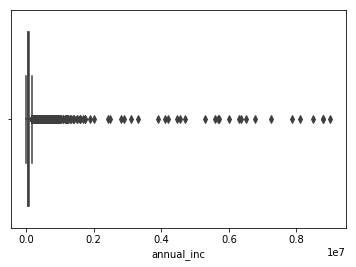

In [18]:
#univariate analysis for outlier detection
sns.boxplot(x=loan_all['annual_inc'])

In [19]:
#identify columns where data missing data percentage is more than 33%
#outliers for annual_inc, those records are outliers which annual income is more that a million dollar i.e. 1e+06
loan_all[loan_all.annual_inc>1e+06]['annual_inc'].count()
#columns for missing data more than 33%
missingdata = [x for x in loan_all.count() < len(loan_all)*0.33]
#print(missingdata)
columns_missing_data = loan_all.columns[missingdata]
print(columns_missing_data)


Index(['member_id', 'desc', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
    

In [20]:
print(len(loan_all.columns))

150


In [21]:
#identify columns where data missing data percentage is more than 20%
#outliers for annual_inc, those records are outliers which annual income is more that a million dollar i.e. 1e+06
loan_all[loan_all.annual_inc>1e+06]['annual_inc'].count()
#columns for missing data more than 33%
missingdata = [x for x in loan_all.count() < len(loan_all)*0.20]
#print(missingdata)
columns_missing_data = loan_all.columns[missingdata]
print(columns_missing_data)

Index(['member_id', 'desc', 'mths_since_last_record', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'mths_since_recent_bc_dlq',
       'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       

In [22]:
#PreProcessing

#It appears there are a lot of NaNs. Few cols with 100% NAs- id, member_id, url; zip_code info is masked
loan_all.drop(['id', 'member_id', 'url', 'zip_code' ,'title' ], axis=1, inplace=True)

#also dropping cols with < 1/3 data
missingdata = [x for x in loan_all.count() < len(loan_all)*0.33]
loan_all.drop(loan_all.columns[missingdata], axis=1, inplace=True)
loan_all.shape
loan_all.columns

unique = loan_all.nunique()
unique = unique[unique.values == 1]
loan_all.drop(labels = list(unique.index), axis =1, inplace=True)
missingdata = [x for x in loan_all.count() < len(loan_all)*0.33]
loan_all.drop(loan_all.columns[missingdata], axis=1, inplace=True)
loan_all.shape
loan_all.columns

loan_all['annual_inc']= loan_all['annual_inc'].astype(float)
loan_all['annual_inc'].describe()
#len(loan_all[loan_all['annual_inc']>1e+06]) #251 appear to be outliers
loan=loan_all.drop(loan_all[loan_all.annual_inc>1e+06].index)

#data cleaning- bucketing, drop NAs
loan['revol_util'].isnull().sum() #856 NAs
loan[loan['revol_util'].isnull()]['loan_status'].value_counts() #mostly current loans
loan.dropna(subset=['revol_util'],inplace=True)
loan['revol_util'].isna().sum()

#buckets
loan['int_rate']=loan['int_rate'].astype(str)
loan['int_rate']= loan['int_rate'].map(lambda x: x.rstrip('%'))
loan['int_rate']= loan['int_rate'].astype(float)
loan['int_rate'].describe() # 5-30.9


count    115385.000000
mean         12.715300
std           4.853435
min           6.000000
25%           8.190000
50%          11.800000
75%          15.570000
max          30.890000
Name: int_rate, dtype: float64

In [23]:
print(len(loan.columns))

99


In [24]:
#1. selecting features based on correlation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
X_temp= loan[loan.columns.difference(['loan_status'])] #except label
y_temp = loan['loan_status']

#encode the categorial or string variables to number using encoding 
selected_columns =X_temp.columns
categorical_columns = X_temp.select_dtypes(include='object').columns
for x in categorical_columns:
    X_temp[x] = label_encoder.fit_transform(X_temp[x].astype(str)).astype('float64')



/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


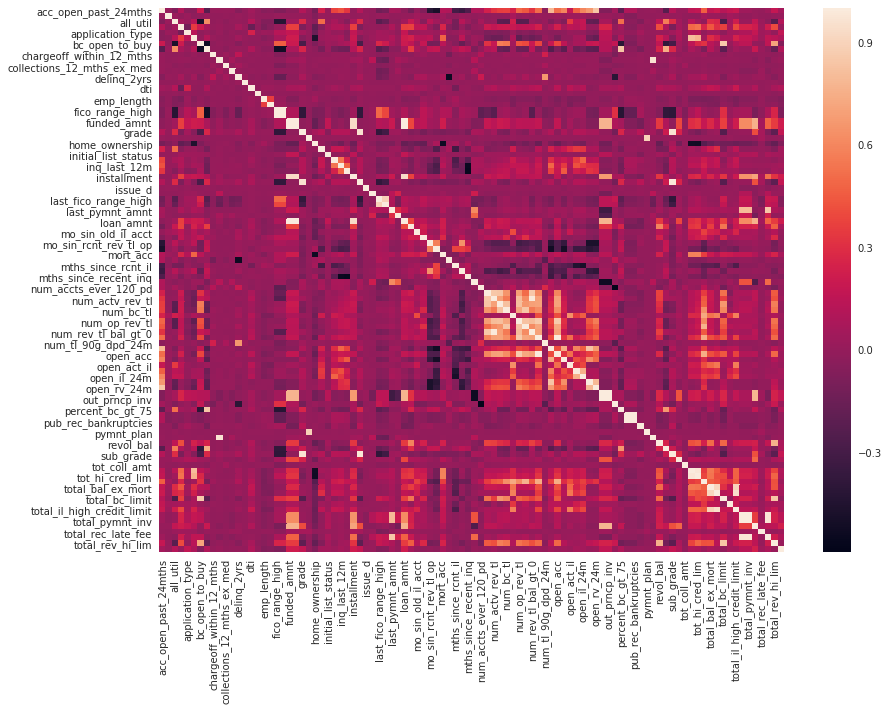

In [25]:
sns.set(rc={'figure.figsize':(14,10)})
loan_cols_corr = X_temp.corr()
sns.heatmap(loan_cols_corr)

In [26]:
print(len(X_temp.columns))
print(loan_cols_corr.shape[0])

98
98


In [27]:
#Next, we compare the correlation between features  and identify highly correlated variables 
#and remove one of two features that have a correlation higher than 0.8
cols = np.full((loan_cols_corr.shape[0],), True, dtype=bool)
cols_1 = []
for i in range(loan_cols_corr.shape[0]):
    for j in range(i+1, loan_cols_corr.shape[0]):
        if loan_cols_corr.iloc[i,j] >= 0.8:
            cols_1.append("(''" + loan_cols_corr.index[i] + "'' is highly correlated to ''" + loan_cols_corr.columns[j]+ "'')")
            if cols[j]:
                cols[j] = False
#insignificant_columns = X_temp.columns[cols]
#print(insignificant_columns)
print(len(X_temp.columns))
print(len(cols))
cols_1

98
98


["(''acc_open_past_24mths'' is highly correlated to ''open_rv_24m'')",
 "(''avg_cur_bal'' is highly correlated to ''tot_cur_bal'')",
 "(''bc_open_to_buy'' is highly correlated to ''total_bc_limit'')",
 "(''bc_util'' is highly correlated to ''percent_bc_gt_75'')",
 "(''collection_recovery_fee'' is highly correlated to ''recoveries'')",
 "(''fico_range_high'' is highly correlated to ''fico_range_low'')",
 "(''funded_amnt'' is highly correlated to ''funded_amnt_inv'')",
 "(''funded_amnt'' is highly correlated to ''installment'')",
 "(''funded_amnt'' is highly correlated to ''loan_amnt'')",
 "(''funded_amnt_inv'' is highly correlated to ''installment'')",
 "(''funded_amnt_inv'' is highly correlated to ''loan_amnt'')",
 "(''grade'' is highly correlated to ''int_rate'')",
 "(''grade'' is highly correlated to ''sub_grade'')",
 "(''hardship_flag'' is highly correlated to ''pymnt_plan'')",
 "(''installment'' is highly correlated to ''loan_amnt'')",
 "(''int_rate'' is highly correlated to ''sub_

In [28]:
#remove one of two features that have a correlation higher than 0.8
columns = np.full((loan_cols_corr.shape[0],), True, dtype=bool)
insig_columns = np.full((loan_cols_corr.shape[0],), False, dtype=bool)
for i in range(loan_cols_corr.shape[0]):
    for j in range(i+1, loan_cols_corr.shape[0]):
        if loan_cols_corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
                insig_columns[j] = True
selected_columns = X_temp.columns[columns]
not_selected_columns = X_temp.columns[insig_columns]
X_temp_new = X_temp[selected_columns]

In [29]:
print(len(X_temp_new.columns))

68


In [30]:
for x in not_selected_columns:
    print(x)

fico_range_low
funded_amnt_inv
installment
int_rate
last_fico_range_low
loan_amnt
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
open_acc
open_rv_12m
open_rv_24m
out_prncp_inv
percent_bc_gt_75
pub_rec_bankruptcies
pymnt_plan
recoveries
sub_grade
tot_cur_bal
tot_hi_cred_lim
total_bal_il
total_bc_limit
total_il_high_credit_limit
total_pymnt_inv
total_rec_prncp
total_rev_hi_lim


In [31]:
# derived variables as part of preprocessing
buck = [0, 5, 10, 15, 20,25, 35]
lab = ['0-5', '5-10', '10-15', '15-20', '20-25','>25']
loan['int_rate_range'] = pd.cut(loan['int_rate'], buck, labels=lab)

loan['loan_amnt'].describe() #0-40k
buck = [0, 5000, 10000, 15000, 20000, 25000,40000]
lab = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], buck, labels=lab)

loan['annual_inc'].describe() #range 1 to 1 mill
buck = [0, 25000, 50000, 75000, 100000,1000000]
lab = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], buck, labels=lab)

In [32]:
#total records after preprocessing
total = len(loan)
print('total records after preprocessing',total)

total records after preprocessing 115385


In [33]:
print(loan['int_rate_range'].value_counts())

10-15    44758
5-10     37025
15-20    25841
20-25     5351
>25       2410
0-5          0
Name: int_rate_range, dtype: int64


In [34]:
print(loan['loan_amnt_range'].value_counts())

5000-10000         28850
25000 and above    22157
10000-15000        21118
15000-20000        18284
0-5000             13890
20000-25000        11086
Name: loan_amnt_range, dtype: int64


In [35]:
loan['annual_inc_range'].value_counts()

50000-75000         32544
100000 and above    27918
25000-50000         27745
75000-100000        22123
0-25000              4801
Name: annual_inc_range, dtype: int64

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


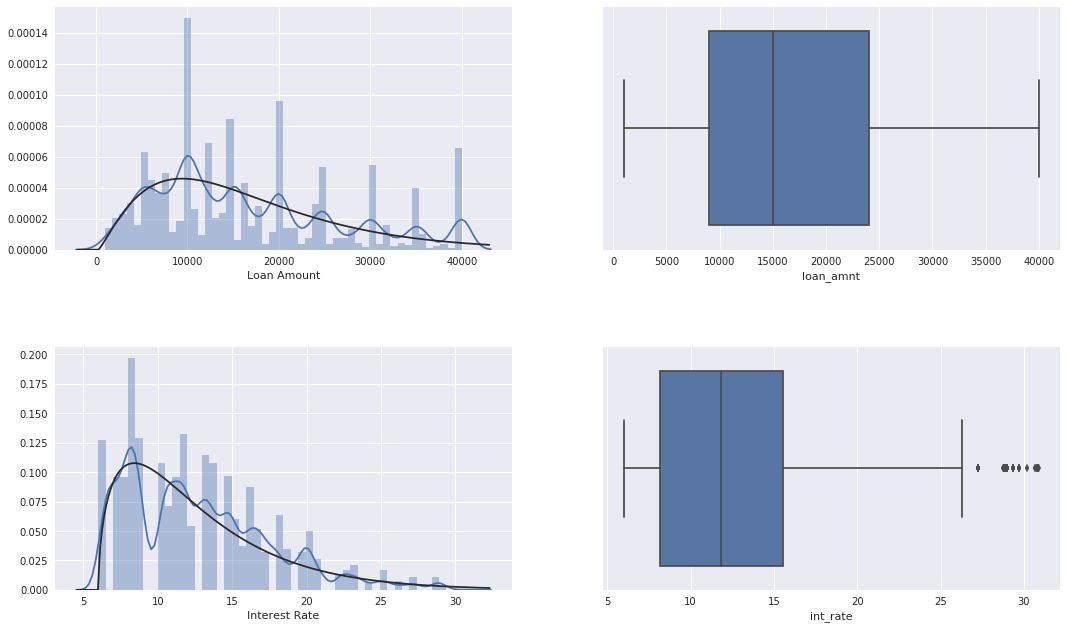

In [36]:
#distribution of loan amount and interest rate
tmp = loan[["loan_amnt", "int_rate"]]
#loanDF.printSchema()

fig, ax =plt.subplots(2,2, figsize=(18,12))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

# Loan amount distribution plots
sns.distplot(tmp.loan_amnt, fit=stats.gamma, axlabel="Loan Amount", label="Loan Amount Frequency distribution", ax=ax[0][0])
sns.boxplot(x=tmp.loan_amnt, ax=ax[0][1])

# Interest rates distribution plots
sns.distplot(tmp.int_rate, fit=stats.gamma, axlabel="Interest Rate", label="Interest Frequency distribution", ax=ax[1][0])
sns.boxplot(x=tmp.int_rate, ax=ax[1][1])

fig.show()
fig.savefig("fig_loan_amount_and_interest_rate_distribution.png")

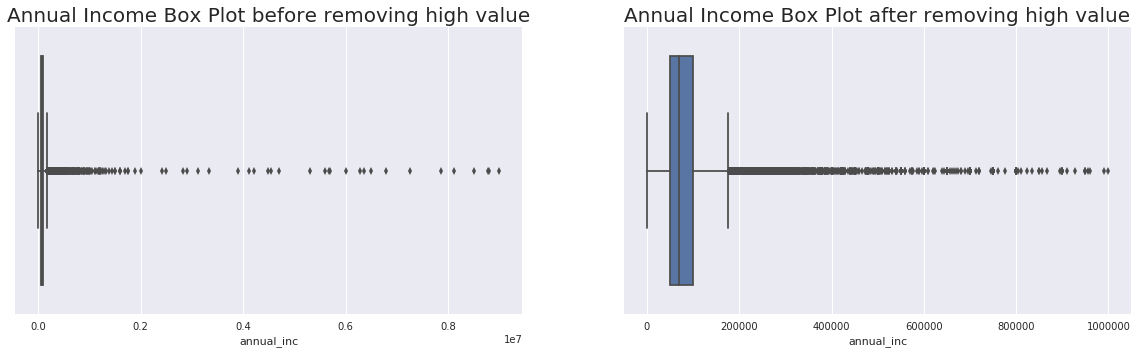

In [37]:
#distribution of annual income
loan_annual_inc_plot = loan_all.loc[(loan_all['annual_inc'] < 0.1e+7)]
#univariate analysis for outlier detection
#sns.boxplot(x=loan_all['annual_inc'])
sns.set(rc={'figure.figsize':(20,5.27)})
fig, ax =plt.subplots(1,2)

plot1 = sns.boxplot(x=loan_all['annual_inc'],ax=ax[0])
plot1.set_title("Annual Income Box Plot before removing high value", fontsize=20)
plot2 = sns.boxplot(x=loan_annual_inc_plot['annual_inc'],ax=ax[1])
plot2.set_title("Annual Income Box Plot after removing high value", fontsize=20)
fig.savefig("fig_annual_income_box_plot.png")                     


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


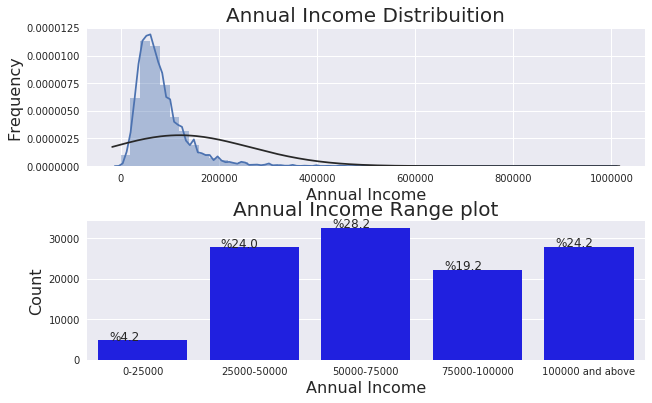

In [38]:
#Distribution of annual income 
total = len(loan['annual_inc_range'])
import math
#I will start looking the loan_amnt column
sns.set(rc={'figure.figsize':(10,5.27)})
fig, ax =plt.subplots(2,1)
#fig, g = plt.subplots(figsize=(10,7))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

# Loan Amt frequency plot

g = sns.distplot(loan_annual_inc_plot['annual_inc'], 
                 fit=stats.gamma, axlabel="Annual Income", label="Annual Income Frequency distribution",ax=ax[0])
g.set_xlabel("Annual Income", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Annual Income Distribuition", fontsize=20)


## Interest plot
plt.subplots_adjust(top=1)
g1 = sns.countplot(x="annual_inc_range", data=loan, 
                  color='blue',ax=ax[1])
g1.set_xlabel("Annual Income", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Annual Income Range plot", fontsize=20)

for p in g1.patches:
        x = float(p.get_height())
        if (math.isnan(x)):
            height = 0
        else:
            height = p.get_height()
        
        g1.annotate('%{:.1f}'.format(height/total*100), (p.get_x()+0.1, height+50))
plt.show()
#g1_fig = g1.get_figure()
#fig.savefig("Loan Amount And Interest Rate Distribuition.png")
fig.savefig("fig_annual_income_distribution.png")

In [39]:
loan_annual_inc_plot['annual_inc'].describe()

count    115511.000000
mean      83354.784205
std       58091.094821
min           0.000000
25%       49000.000000
50%       70000.000000
75%      100000.000000
max      999400.000000
Name: annual_inc, dtype: float64

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


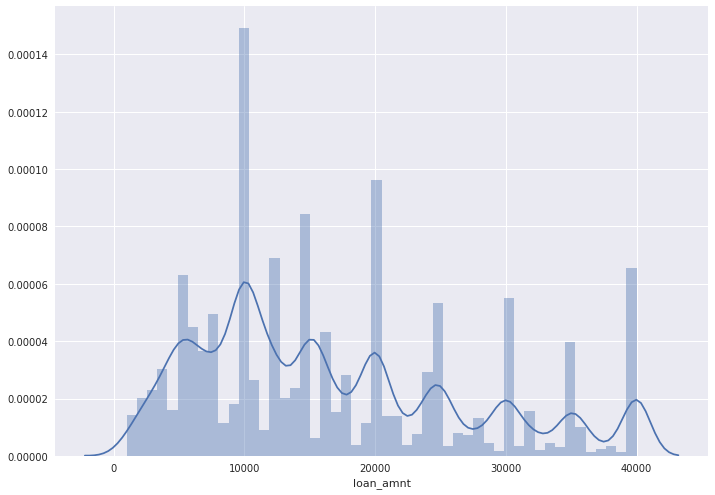

In [40]:

#loan amount plotting
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(loan['loan_amnt'])







/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


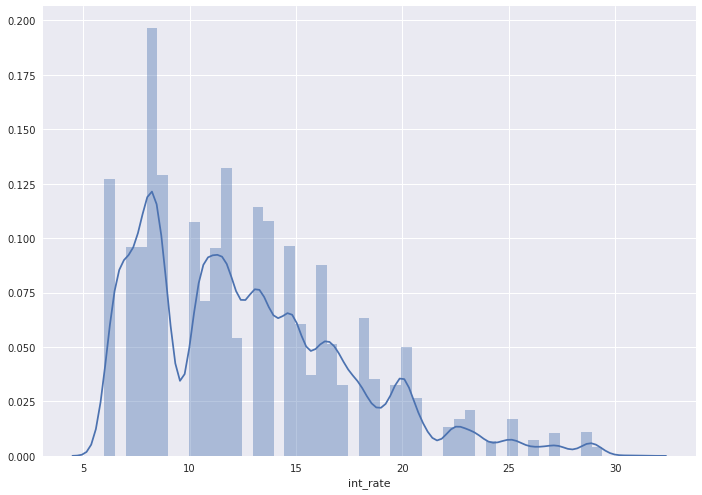

In [41]:
#interest rate frequency plot
sns.distplot(loan['int_rate'])


In [42]:
loan['int_rate_range'].head()
#print(np.any(np.isnan(X)))

0    15-20
1    15-20
2     5-10
3    20-25
4     5-10
Name: int_rate_range, dtype: category
Categories (6, object): [0-5 < 5-10 < 10-15 < 15-20 < 20-25 < >25]

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


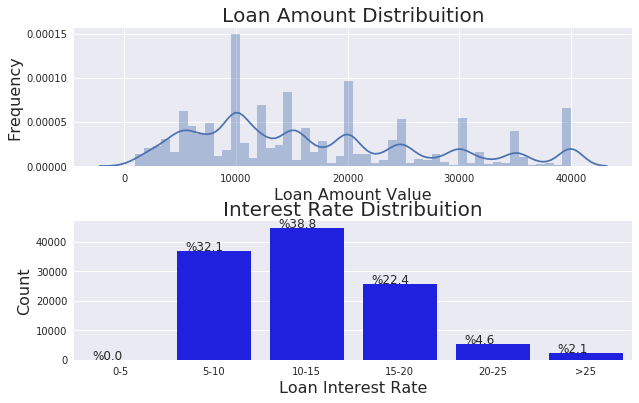

In [43]:
#LOAN AMOUNT and INTEREST RATE Distributions
total = len(loan)
import math
#I will start looking the loan_amnt column
sns.set(rc={'figure.figsize':(10,5.27)})
fig, ax =plt.subplots(2,1)
#fig, g = plt.subplots(figsize=(10,7))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

# Loan Amt frequency plot

g = sns.distplot(loan["loan_amnt"],ax=ax[0])
g.set_xlabel("Loan Amount Value", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribuition", fontsize=20)


## Interest plot
plt.subplots_adjust(top=1)
g1 = sns.countplot(x="int_rate_range", data=loan, 
                  color='blue',ax=ax[1])
g1.set_xlabel("Loan Interest Rate", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Interest Rate Distribuition", fontsize=20)

for p in g1.patches:
        x = float(p.get_height())
        if (math.isnan(x)):
            height = 0
        else:
            height = p.get_height()
        
        g1.annotate('%{:.1f}'.format(height/total*100), (p.get_x()+0.1, height+50))
plt.show()
#g1_fig = g1.get_figure()
#fig.savefig("Loan Amount And Interest Rate Distribuition.png")
fig.savefig("fig_loan_and_interest_dist.png")


Text(0.5,1,'Annual Income Box Plot after removing high value')

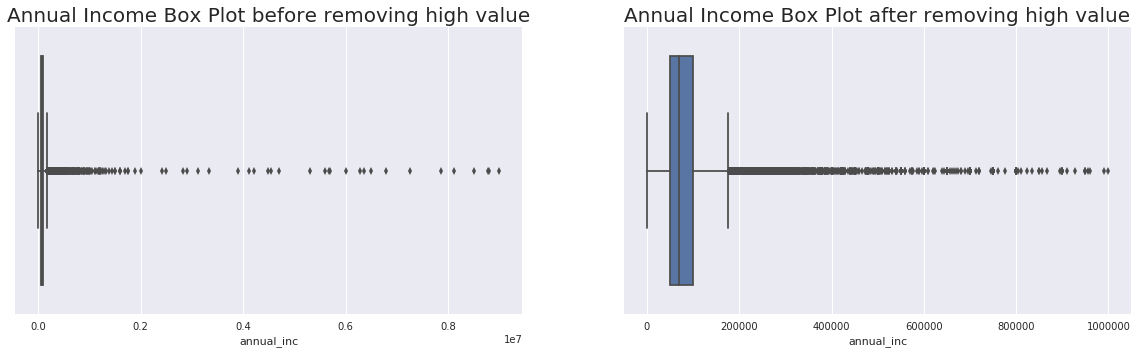

In [44]:
#univariate analysis for outlier detection
#sns.boxplot(x=loan_all['annual_inc'])
loan_annual_inc_plot = loan_all.loc[(loan_all['annual_inc'] < 0.1e+7)]
sns.set(rc={'figure.figsize':(20,5.27)})
fig, ax =plt.subplots(1,2)

plot1 = sns.boxplot(x=loan_all['annual_inc'],ax=ax[0])
plot1.set_title("Annual Income Box Plot before removing high value", fontsize=20)
plot2 = sns.boxplot(x=loan_annual_inc_plot['annual_inc'],ax=ax[1])
plot2.set_title("Annual Income Box Plot after removing high value", fontsize=20)
                     

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


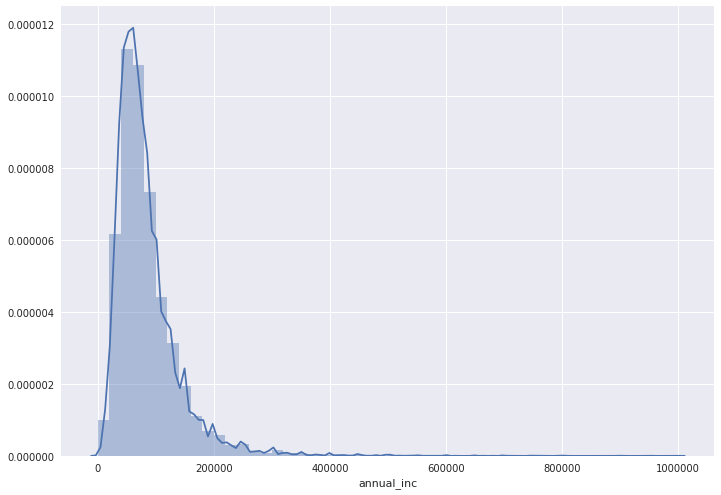

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(loan['annual_inc'])



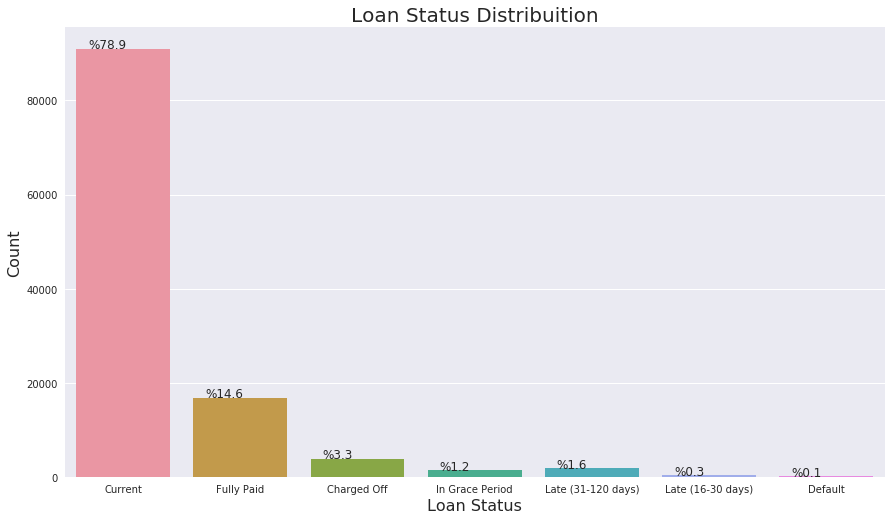

Current               91008
Fully Paid            16828
Charged Off            3865
Late (31-120 days)     1846
In Grace Period        1404
Late (16-30 days)       360
Default                  74
Name: loan_status, dtype: int64

In [46]:
#distribution of loan status
sns.set(rc={'figure.figsize':(14.7,8.27)})
g1 = sns.countplot(loan['loan_status'])
g1.set_xlabel("Loan Status", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Loan Status Distribuition", fontsize=20)
for p in g1.patches:
        x = float(p.get_height())
        if (math.isnan(x)):
            height = 0
        else:
            height = p.get_height()
        #g1.annotate(height, (p.get_x()+0.1, height+50))
        g1.annotate('%{:.1f}'.format(height/total*100), (p.get_x()+0.1, height+50))
        
plt.show()   
g1_fig = g1.get_figure()
g1_fig.savefig("fig_distribution_of_loan_status.png")
loan['loan_status'].value_counts()

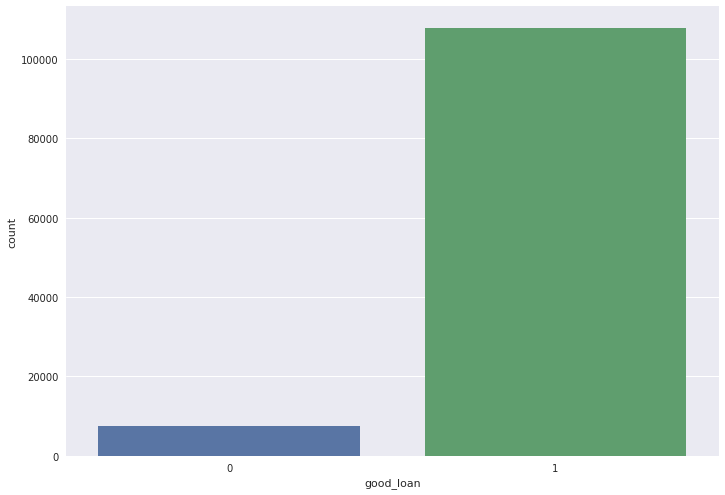

In [47]:
#derived variable 'good_loan'
#distribution of derived variable 'good_loan'
#good loans- Fully paid, current and bad loans- charged off,default, late, in grace period 
#deleting issued loans from data

loan['loan_status'].value_counts()/len(loan)
loan.drop(loan[loan.loan_status== 'Issued'].index, inplace=True)
loan['good_loan'] = np.where((loan.loan_status == 'Fully Paid') |
                        (loan.loan_status == 'Current'), 1, 0)
loan['good_loan'].value_counts()/len(loan)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns_plot_good_vs_bad_loan = sns.countplot(loan['good_loan'])
fig_good_vs_bad_loan = sns_plot_good_vs_bad_loan.get_figure()
fig_good_vs_bad_loan.savefig("fig_good_vs_bad_loan.png")




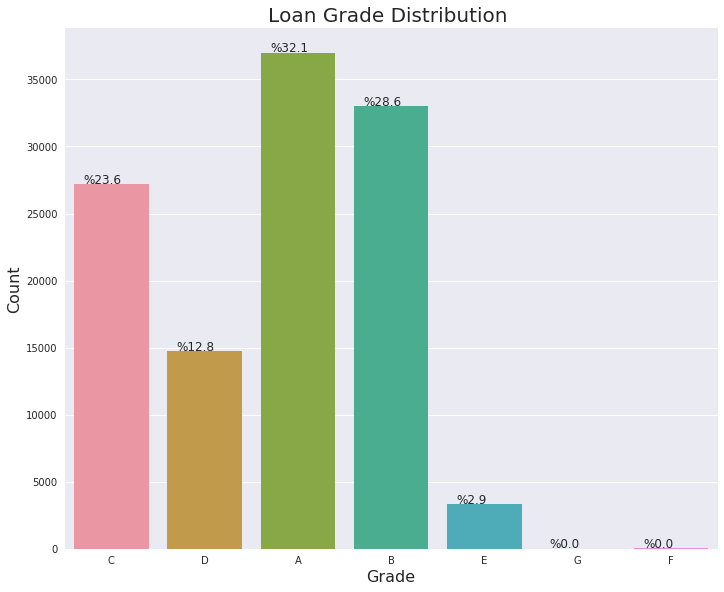

In [48]:
#most common loan grade
plt.subplots_adjust(top=1)
sns.set(rc={'figure.figsize':(8,5)})
g1 = sns.countplot(x="grade", data=loan)
g1.set_xlabel("Grade", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Loan Grade Distribution ", fontsize=20)

height = len(loan['grade'])

for p in g1.patches:
        x = float(p.get_height())
        if (math.isnan(x)):
            height = 0
        else:
            height = p.get_height()
        
        g1.annotate('%{:.1f}'.format(height/total*100), (p.get_x()+0.1, height+50))
plt.show()
g1_fig = g1.get_figure()
g1_fig.savefig("fig_loan_grade_distribution.png")

In [49]:
loan['sub_grade'].unique()

array(['C4', 'D2', 'A4', 'D3', 'A3', 'C3', 'A5', 'C1', 'B4', 'B5', 'B2',
       'C2', 'B3', 'D1', 'C5', 'A1', 'D5', 'A2', 'D4', 'B1', 'E5', 'G2',
       'E1', 'E2', 'G1', 'E3', 'E4', 'F5', 'F1', 'F4', 'F2', 'F3', 'G3'],
      dtype=object)

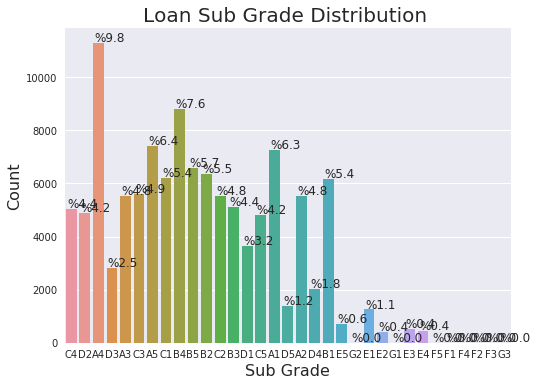

In [50]:
#most common loan sub grade
plt.subplots_adjust(top=1)
sns.set(rc={'figure.figsize':(15,7)})
g1 = sns.countplot(x="sub_grade", data=loan)
g1.set_xlabel("Sub Grade", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Loan Sub Grade Distribution ", fontsize=20)

height = len(loan['sub_grade'])

for p in g1.patches:
        x = float(p.get_height())
        if (math.isnan(x)):
            height = 0
        else:
            height = p.get_height()
        
        g1.annotate('%{:.1f}'.format(height/total*100), (p.get_x()+0.1, height+50))
plt.show()
g1_fig = g1.get_figure()
g1_fig.savefig("fig_loan_sub_grade_distribution.png")

In [51]:
for x in loan.columns:
    print (x)

loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
purpose
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
application_type
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_

In [52]:
loan['purpose'].unique()

array(['credit_card', 'other', 'debt_consolidation', 'home_improvement',
       'car', 'small_business', 'medical', 'major_purchase', 'moving',
       'house', 'vacation', 'renewable_energy'], dtype=object)

In [53]:
loan['application_type'].unique()

array(['Individual', 'Joint App'], dtype=object)

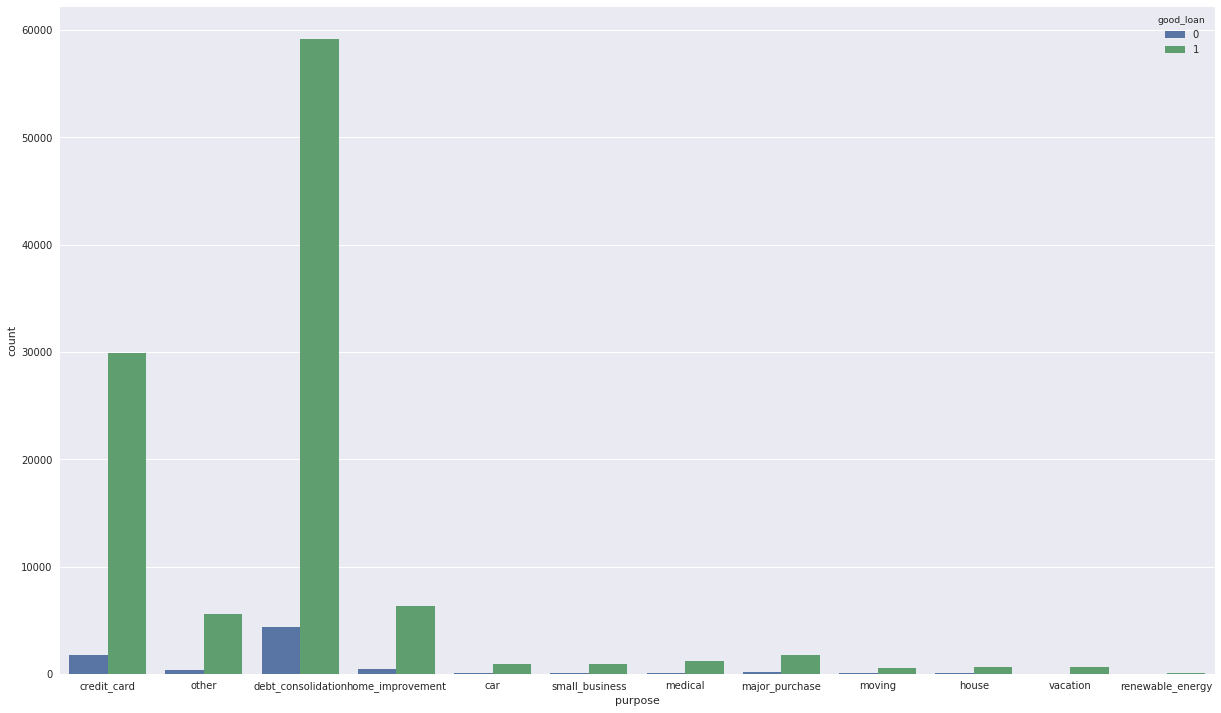

In [54]:
sns.set(rc={'figure.figsize':(20.7,12.27)})

sns.countplot(loan['purpose'],hue=loan['good_loan'])


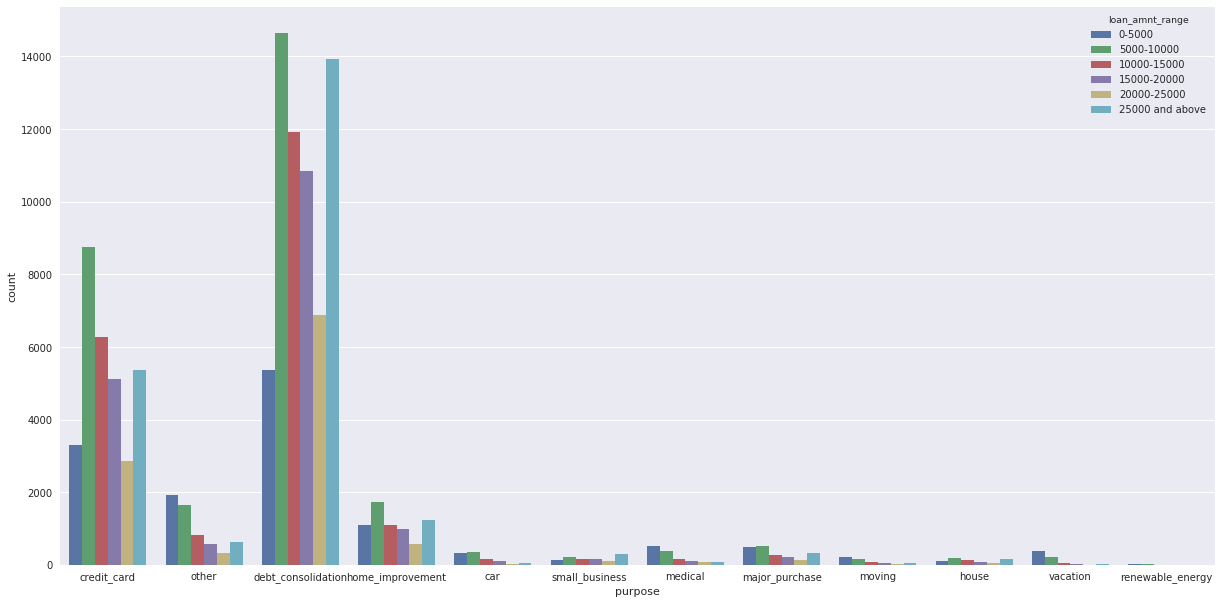

In [55]:
sns.set(rc={'figure.figsize':(20.7,10.27)})
sns.countplot(loan['purpose'],hue=loan['loan_amnt_range'])

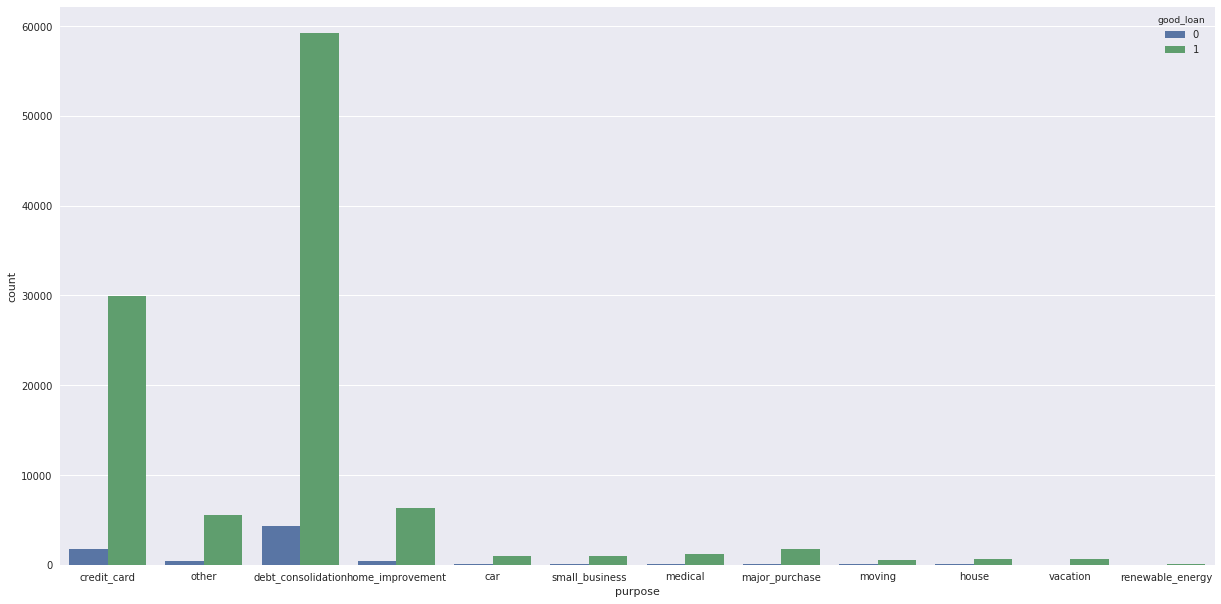

In [56]:
sns.set(rc={'figure.figsize':(20.7,10.27)})
sns.countplot(loan['purpose'],hue=loan['good_loan'])



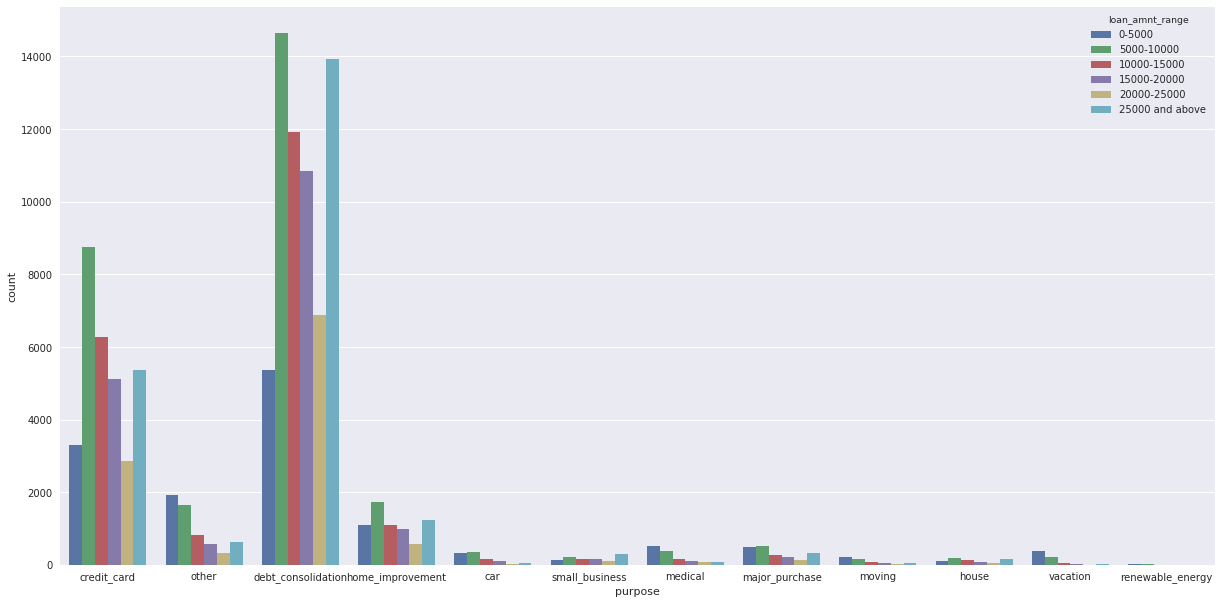

In [57]:
sns.set(rc={'figure.figsize':(20.7,10.27)})
sns.countplot(loan['purpose'],hue=loan['loan_amnt_range'])

In [58]:
loan['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE'], dtype=object)

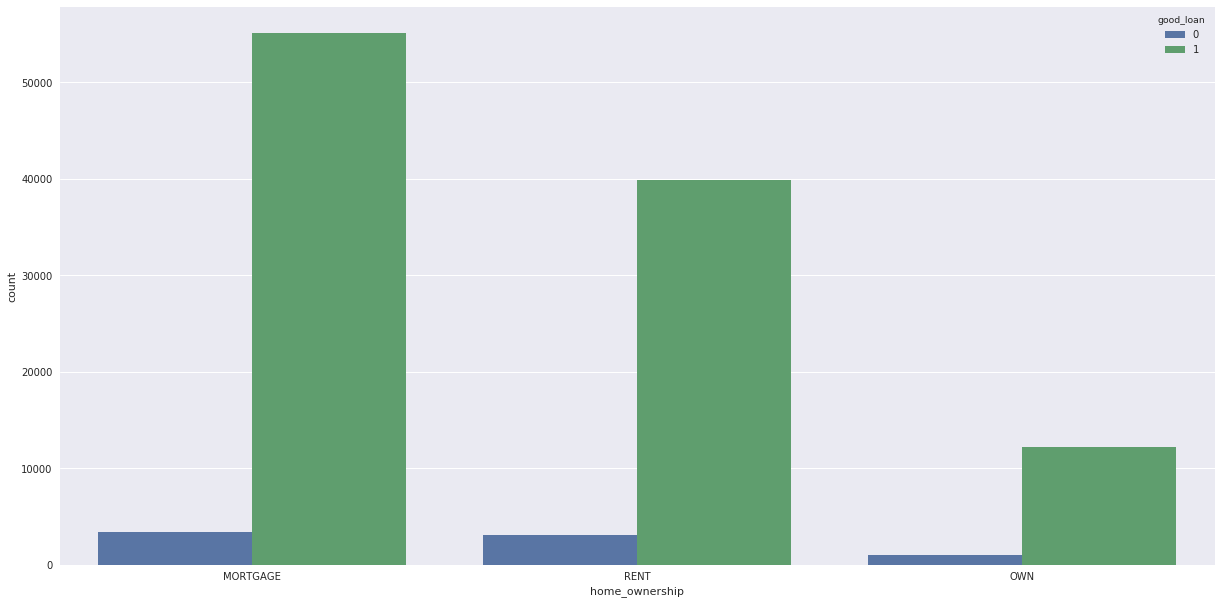

In [59]:
#home ownership- any and none dont signify anything
sns.set(rc={'figure.figsize':(20.7,10.27)})
loan.drop(loan[loan['home_ownership']== 'ANY'].index, inplace=True)
loan.drop(loan[loan['home_ownership']== 'NONE'].index, inplace=True)
sns.countplot(loan['home_ownership'],hue=loan['good_loan']) 



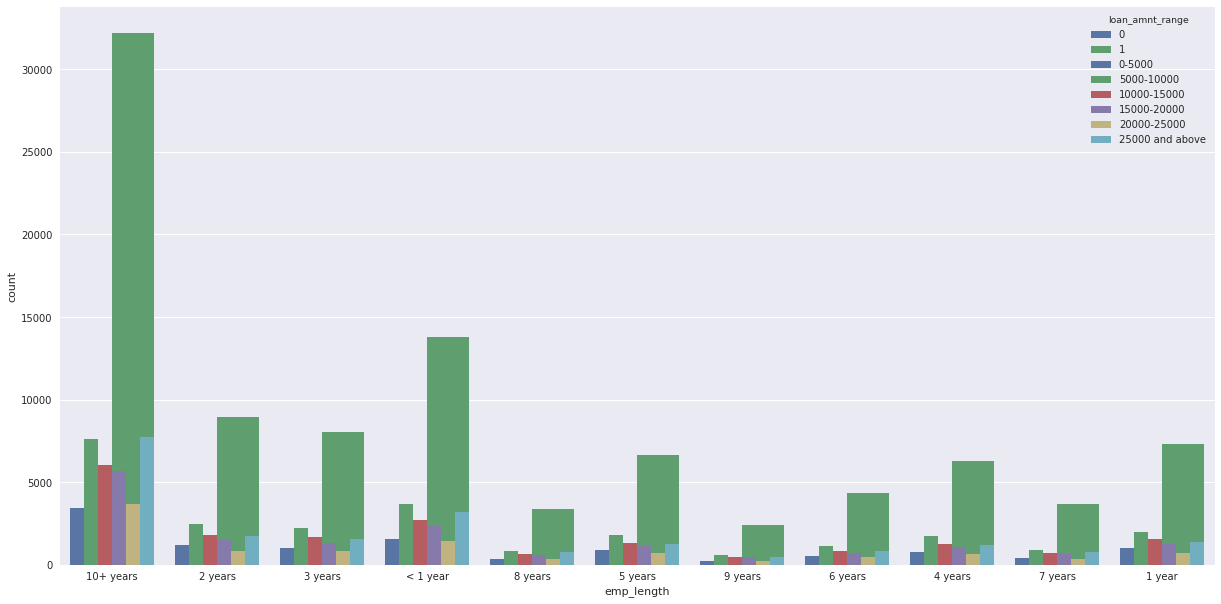

In [60]:
#employment length
sns.set(rc={'figure.figsize':(20.7,10.27)})
sns.countplot(loan['emp_length'],hue=loan['good_loan'])
sns.countplot(loan['emp_length'],hue=loan['loan_amnt_range'])



In [61]:
loan['addr_state'].unique()

array(['NC', 'TX', 'LA', 'IL', 'NJ', 'FL', 'AZ', 'OK', 'AR', 'IN', 'WI',
       'NY', 'WY', 'TN', 'CA', 'MA', 'MO', 'MI', 'ND', 'NM', 'AL', 'GA',
       'WA', 'OR', 'OH', 'MN', 'PA', 'MD', 'VA', 'KY', 'UT', 'ID', 'MT',
       'CO', 'SC', 'NH', 'NV', 'CT', 'KS', 'HI', 'MS', 'AK', 'ME', 'DC',
       'WV', 'DE', 'NE', 'SD', 'RI', 'VT'], dtype=object)

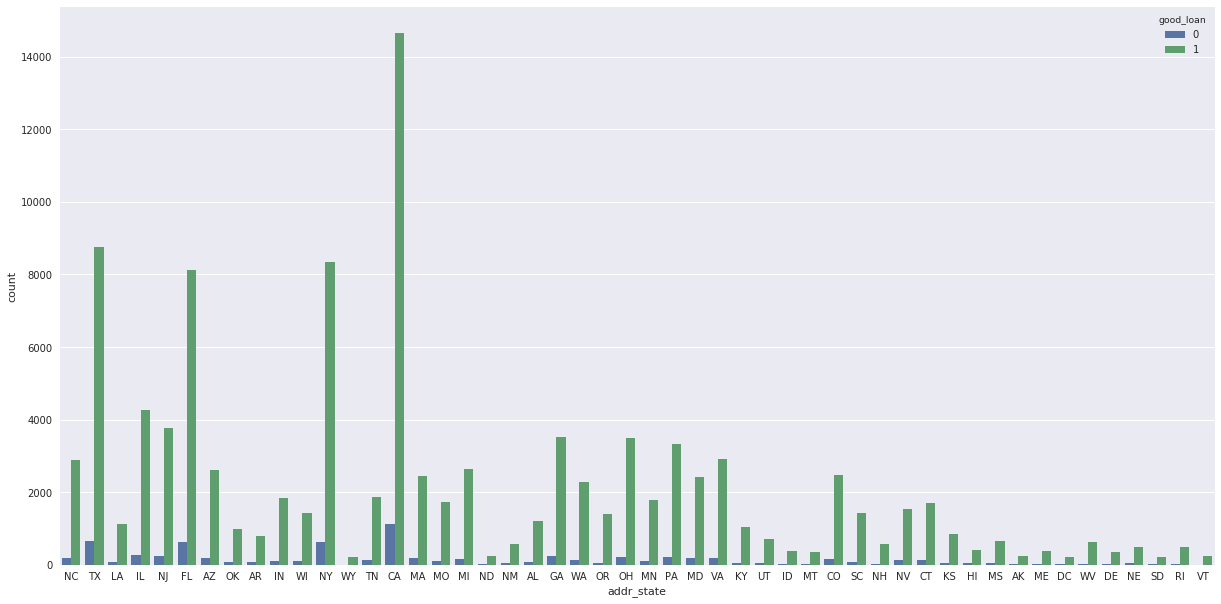

In [62]:
#geography
sns.set(rc={'figure.figsize':(20.7,10.27)})
sns.countplot(loan['addr_state'],hue=loan['good_loan']) 


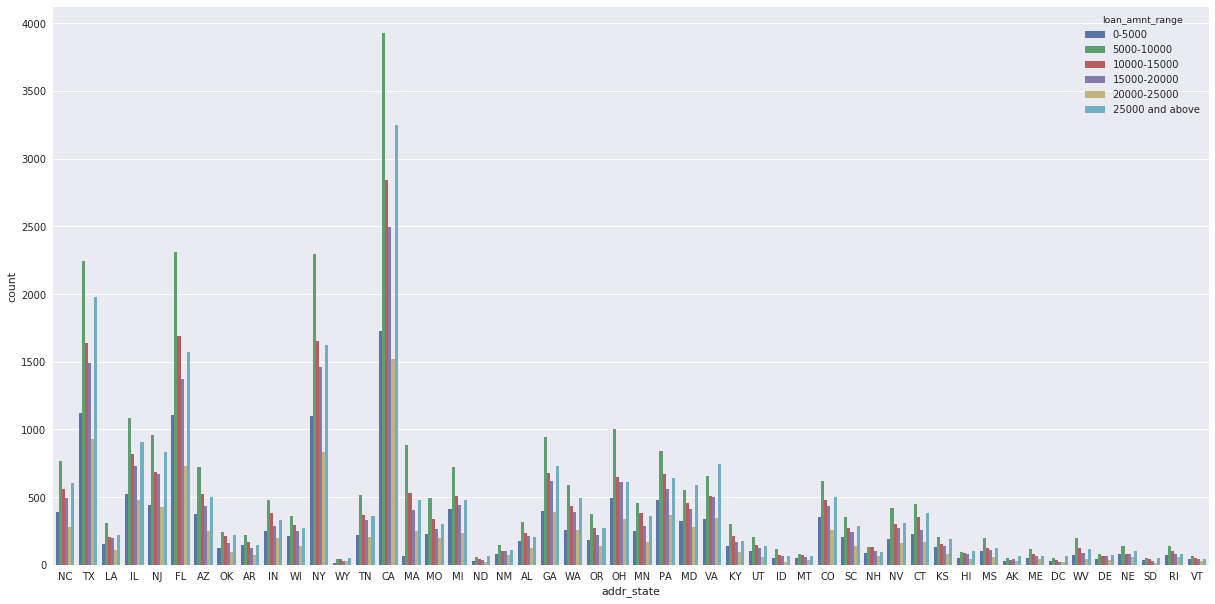

In [63]:
sns.countplot(loan['addr_state'],hue=loan['loan_amnt_range']) 

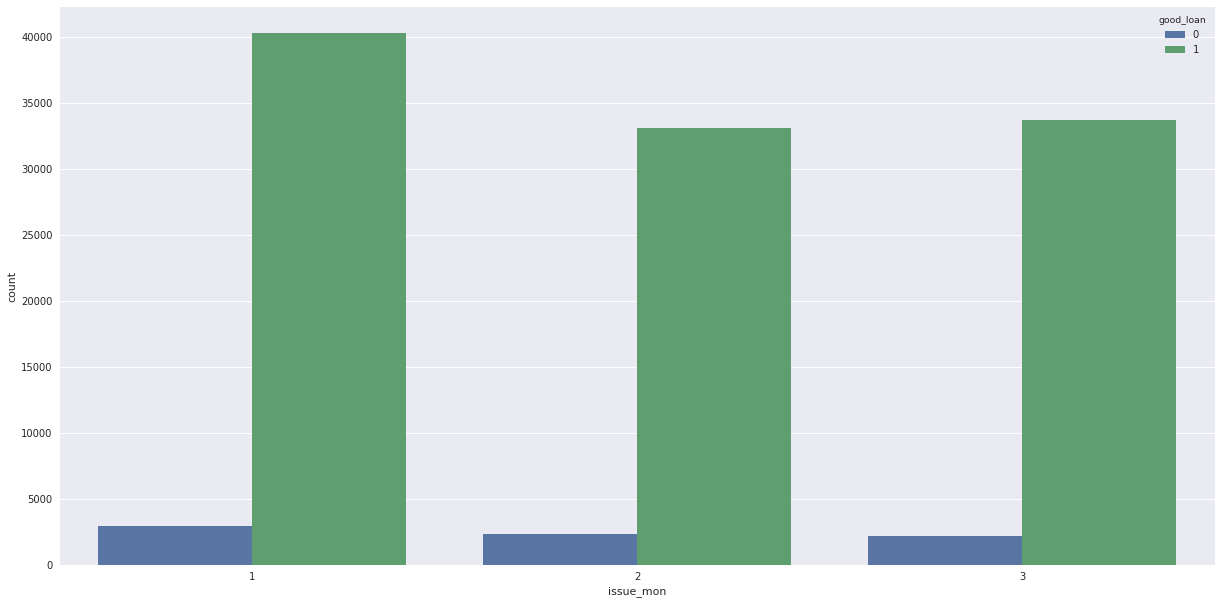

In [64]:
#monthly trend
loan['issue_yr']=pd.DatetimeIndex(loan['issue_d']).year
loan['issue_mon']=pd.DatetimeIndex(loan['issue_d']).month
sns.countplot(loan['issue_mon'],hue=loan['good_loan'])

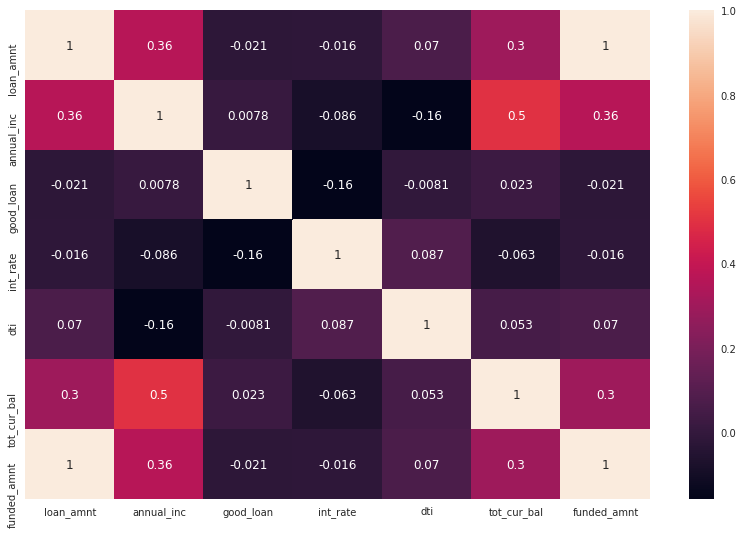

In [65]:
#understanding correlation between some key business variables
cor_loan=loan[['loan_amnt','annual_inc', 'good_loan', 'int_rate', 'dti', 
               'tot_cur_bal', 'funded_amnt']]
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(cor_loan.corr(), 
            xticklabels=cor_loan.columns.values,
            yticklabels=cor_loan.columns.values,annot= True)
plt.show()

In [66]:
#numerical and categorical columns
#categorical columns
categorical_columns = loan.select_dtypes(include='object').columns
print(categorical_columns)
print(type(categorical_columns))
print("categorical_columns count = ",categorical_columns.size)
#numerical columns
numerical_columns = loan.select_dtypes(include ='float64').columns
print(numerical_columns)
print("numerical_columns count = ",numerical_columns.size)
for x in categorical_columns:
    print (x)

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'earliest_cr_line', 'revol_util',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>
categorical_columns count =  21
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'c

In [67]:
#VARIABLE SELECTION ################################
#for classification purpose, we need to drop retrospective variables
loan.drop(['funded_amnt', 'funded_amnt_inv', 'total_pymnt', 
'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 
'recoveries', 'collection_recovery_fee'], axis=1, inplace=True)

#change variable type- encoding - 'earliest_cr_line' and emp_length

loan.head()

loan['emp_length'].value_counts()
emp_range= {'< 1 year':0.5, '1 year':1, '2 years': 2, '3 years':3,
            '4 years':4, '5 years':5,'6 years':6,'7 years':7,
            '8 years':8,'9 years':9, '10+ years':10}
loan['emplen'] = loan["emp_length"].map(emp_range)
loan['emplen'].isnull().sum() 
loan['emplen'].value_counts() 

10.0    34182
0.5     14896
2.0      9588
3.0      8623
1.0      7848
5.0      7129
4.0      6721
6.0      4588
7.0      3868
8.0      3598
9.0      2539
Name: emplen, dtype: int64

In [68]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_rec_late_fee', 'next_pymnt_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'application_type', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open

In [69]:
############Missing Value- Imputation############
nullseries=pd.isnull(loan).sum()
nullseries[nullseries>0]

loan['emplen'] = loan['emplen'].replace(np.nan, 10)
#loan.drop(['emp_length'],axis=1,inplace=True)

loan['mths_since_last_delinq'] = loan['mths_since_last_delinq'].fillna(loan['mths_since_last_delinq'].median()) #mean and median v similar
#loan['mths_since_recent_revol_delinq']=loan['mths_since_recent_revol_delinq'].fillna(loan['mths_since_recent_revol_delinq'].median())
loan['percent_bc_gt_75'] = loan['percent_bc_gt_75'].fillna(loan['percent_bc_gt_75'].median()) #mean and median v similar


In [70]:
#very few missing values for all of them
loan['dti'] = loan['dti'].fillna(loan['dti'].mean())
loan['inq_last_6mths'] = loan['inq_last_6mths'].fillna(loan['inq_last_6mths'].mean())
loan['open_acc_6m'] = loan['open_acc_6m'].fillna(loan['open_acc_6m'].median())
loan['open_act_il'] = loan['open_act_il'].fillna(loan['open_act_il'].median())
loan['open_il_12m'] = loan['open_il_12m'].fillna(loan['open_il_12m'].median())
loan['open_il_24m'] = loan['open_il_24m'].fillna(loan['open_il_24m'].median())
loan['open_rv_12m'] = loan['open_rv_12m'].fillna(loan['open_rv_12m'].median())
loan['open_rv_24m'] = loan['open_rv_24m'].fillna(loan['open_rv_24m'].median())
loan['max_bal_bc'] = loan['max_bal_bc'].fillna(loan['max_bal_bc'].median())
loan['all_util'] = loan['all_util'].fillna(loan['all_util'].median())
loan['inq_fi'] = loan['inq_fi'].fillna(loan['inq_fi'].median())
loan['total_cu_tl'] = loan['total_cu_tl'].fillna(loan['total_cu_tl'].median())
loan['total_bal_il']=loan['total_bal_il'].fillna(loan['total_bal_il'].mean())

loan['inq_last_12m'] = loan['inq_last_12m'].fillna(loan['inq_last_12m'].median())
if set(['num_tl_120dpd_2m']).issubset(loan.columns):
    loan['num_tl_120dpd_2m'] = loan['num_tl_120dpd_2m'].fillna(loan['num_tl_120dpd_2m'].median())
loan['pct_tl_nvr_dlq'] = loan['pct_tl_nvr_dlq'].fillna(loan['pct_tl_nvr_dlq'].median())
#loan['hardship_flag'] = loan['hardship_flag'].fillna(0.0)

In [71]:
#loan['inq_last_12m'].notnull()

In [72]:
#A lot of NAs- with integer values so median replacement
loan['mths_since_rcnt_il']=loan['mths_since_rcnt_il'].fillna(loan['mths_since_rcnt_il'].median())
loan['il_util']=loan['il_util'].fillna(loan['il_util'].median())

In [73]:
loan['bc_open_to_buy'].value_counts() # 0s occur the most
loan['bc_open_to_buy']=loan['bc_open_to_buy'].fillna(0)

In [74]:
# bc_util= total current balance/credit limit
loan[loan['bc_util'].isnull()]['bc_open_to_buy'].value_counts() #mostly 0s
loan[loan['bc_open_to_buy']==0]['bc_util'].value_counts() #bcutil is~100
loan['bc_util']=loan['bc_util'].fillna(100)
loan['mo_sin_old_il_acct']=loan['il_util'].fillna(loan['il_util'].median()) #mostly around 120-130
loan['mths_since_recent_bc']=loan['mths_since_recent_bc'].fillna(loan['mths_since_recent_bc'].median()) #no corr found
loan['mths_since_recent_inq']=loan['mths_since_recent_inq'].fillna(loan['mths_since_recent_inq'].median()) #no corr found
#loan['num_tl_120dpd_2m']=loan['num_tl_120dpd_2m'].fillna(0) #0 common

In [75]:
#Feature Engineering- credit length
loan['earliest_crline_yr']=pd.DatetimeIndex(loan['earliest_cr_line']).year
loan['earliest_crline_mon'],loan['earliest_crline_yr'] = loan['earliest_cr_line'].str.split('-', 1).str

In [76]:
loan['issue_yr'].head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: issue_yr, dtype: int64

In [77]:
#loan['issue_yr'].apply(int)

In [78]:
loan.loc[loan['issue_yr'].apply(pd.to_numeric, args=('coerce',))> 18, 'issue_yr'] = '19' + loan['issue_yr'].astype(str)

In [79]:
#changing similarly for issue year as well- to capture the difference in years
if set(['issue_d','issue_mon']).issubset(loan.columns):
    loan['issue_yr'].apply(int)
    loan.loc[loan['issue_yr'].apply(pd.to_numeric, args=('coerce',))> 18, 'issue_yr'] = '19' + loan['issue_yr'].astype(str)
    loan.loc[loan['issue_yr'].apply(pd.to_numeric, args=('coerce',))< 19, 'issue_yr'] = '20' + loan['issue_yr'].astype(str)
    loan['issue_yr'].apply(int)
    loan.drop(['issue_d', 'issue_mon'], axis=1, inplace=True)

In [80]:
#now to introduce new variable for checking the difference of these 2 and drop them
if set(['issue_yr','earliest_crline_yr']).issubset(loan.columns):
    loan['credit_len']=loan['issue_yr'].apply(int)-loan['earliest_crline_yr'].apply(int)
    loan.drop(['issue_yr', 'earliest_crline_yr'],axis=1, inplace=True)

In [81]:
#Categorical variables- introducing levels/encoding where not ordinal 
#verification status,subgrade, purpose,addr_state

verification_map={'Source Verified':3, 'Verified':2, 'Not Verified':1}
loan['verification_status']=loan['verification_status'].map(verification_map)

ownership_map={'MORTGAGE':1, 'RENT':2, 'OWN':3}
loan['home_ownership']=loan['home_ownership'].map(ownership_map)

subgrade_map={'A1':1,'A2':2, 'A3':3, 'A4':4, 'A5':5, 'B1':6, 'B2':7, 'B3':8, 'B4':9, 'B5':10, 
              'C1':11, 'C2':12, 'C3':13, 'C4':14, 'C5':15, 'D1':16, 'D2':17, 'D3':18, 
              'D4':19, 'D5':20, 'E1':21, 'E2':22, 'E3':23, 'E4':24, 'E5':25, 'F1':26, 
              'F2':27, 'F3':28, 'F4':29, 'F5':30, 'G1':31, 'G2':32, 'G3':33, 'G4':34, 'G5':35}
loan['sub_grade']=loan['sub_grade'].map(subgrade_map)
if set(['grade']).issubset(loan.columns):
    loan.drop(['grade'],axis=1, inplace=True)

hardship_map={'N':0, 'Y':1}
loan['hardship_flag']=loan['hardship_flag'].map(hardship_map)

debtsett_map={'N':0, 'Y':1}
loan['debt_settlement_flag']=loan['debt_settlement_flag'].map(debtsett_map)

In [82]:
#purpose needs to be hot encoded- so better to drop unnecessary levels
if set(['purpose']).issubset(loan.columns):
    loan= loan[loan['purpose'] != 'educational']
    loan= loan[loan['purpose'] !='wedding']
    loan= loan[loan['purpose'] !='other']
    loan['loan_amnt'].isna().sum()
    loan.shape
    enc1= pd.get_dummies(loan['purpose'])
    loan=pd.concat((loan,enc1), axis=1)
    loan.drop(['purpose'],axis=1,inplace=True)

if set(['addr_state']).issubset(loan.columns):
    enc2= pd.get_dummies(loan['addr_state'])
    loan=pd.concat((loan,enc2), axis=1)
    loan.drop(['addr_state'],axis=1,inplace=True)

if set(['disbursement_method']).issubset(loan.columns):
    enc3= pd.get_dummies(loan['disbursement_method'])
    loan=pd.concat((loan,enc3), axis=1)
    loan.drop(['disbursement_method'],axis=1,inplace=True)
if set(['application_type']).issubset(loan.columns):
    enc4= pd.get_dummies(loan['application_type'])
    loan=pd.concat((loan,enc4), axis=1)
    loan.drop(['application_type'],axis=1,inplace=True)

In [83]:
#to delete
if set(['earliest_cr_line','loan_amnt_range', 'annual_inc_range',
           'int_rate_range','loan_status', 'next_pymnt_d','emp_title'
           ,'pymnt_plan','initial_list_status', 'total_rec_late_fee']).issubset(loan.columns):
    loan.drop(['earliest_cr_line','loan_amnt_range', 'annual_inc_range',
           'int_rate_range','loan_status', 'next_pymnt_d','emp_title'
           ,'pymnt_plan','initial_list_status', 'total_rec_late_fee'],axis=1, inplace=True)
#loan.isna()
#loan.isnull().sum()

In [84]:

#get the data types of the columns
loan.dtypes
#loan.select_dtypes(include=['object'])
dataTypeDict = dict(loan.dtypes)
print(dataTypeDict)

{'loan_amnt': dtype('float64'), 'term': dtype('O'), 'int_rate': dtype('float64'), 'installment': dtype('float64'), 'sub_grade': dtype('int64'), 'emp_length': dtype('O'), 'home_ownership': dtype('int64'), 'annual_inc': dtype('float64'), 'verification_status': dtype('int64'), 'dti': dtype('float64'), 'delinq_2yrs': dtype('float64'), 'fico_range_low': dtype('float64'), 'fico_range_high': dtype('float64'), 'inq_last_6mths': dtype('float64'), 'mths_since_last_delinq': dtype('float64'), 'open_acc': dtype('float64'), 'pub_rec': dtype('float64'), 'revol_bal': dtype('float64'), 'revol_util': dtype('O'), 'total_acc': dtype('float64'), 'out_prncp': dtype('float64'), 'out_prncp_inv': dtype('float64'), 'last_fico_range_high': dtype('float64'), 'last_fico_range_low': dtype('float64'), 'collections_12_mths_ex_med': dtype('float64'), 'tot_coll_amt': dtype('float64'), 'tot_cur_bal': dtype('float64'), 'open_acc_6m': dtype('float64'), 'open_act_il': dtype('float64'), 'open_il_12m': dtype('float64'), 'ope

In [85]:
loan.select_dtypes(include=['object'])

,term,emp_length,revol_util,earliest_crline_mon
0,60 months,10+ years,60.9%,Aug
2,36 months,2 years,18.3%,Sep
3,60 months,10+ years,52.4%,Nov
4,36 months,3 years,74.2%,Oct
5,60 months,< 1 year,40.7%,Feb
6,36 months,10+ years,33.4%,Feb
7,36 months,NaN,36.1%,Oct
9,60 months,8 years,42%,Nov
10,36 months,3 years,34.8%,Sep
11,60 months,5 years,45.3%,Mar


In [86]:
#loan dataset considered for model development
loan_final = loan.copy(deep=True)


In [87]:
#get the data types of the columns
loan_final.dtypes
#loan.select_dtypes(include=['object'])
dataTypeDict = dict(loan_final.dtypes)
print(dataTypeDict)

{'loan_amnt': dtype('float64'), 'term': dtype('O'), 'int_rate': dtype('float64'), 'installment': dtype('float64'), 'sub_grade': dtype('int64'), 'emp_length': dtype('O'), 'home_ownership': dtype('int64'), 'annual_inc': dtype('float64'), 'verification_status': dtype('int64'), 'dti': dtype('float64'), 'delinq_2yrs': dtype('float64'), 'fico_range_low': dtype('float64'), 'fico_range_high': dtype('float64'), 'inq_last_6mths': dtype('float64'), 'mths_since_last_delinq': dtype('float64'), 'open_acc': dtype('float64'), 'pub_rec': dtype('float64'), 'revol_bal': dtype('float64'), 'revol_util': dtype('O'), 'total_acc': dtype('float64'), 'out_prncp': dtype('float64'), 'out_prncp_inv': dtype('float64'), 'last_fico_range_high': dtype('float64'), 'last_fico_range_low': dtype('float64'), 'collections_12_mths_ex_med': dtype('float64'), 'tot_coll_amt': dtype('float64'), 'tot_cur_bal': dtype('float64'), 'open_acc_6m': dtype('float64'), 'open_act_il': dtype('float64'), 'open_il_12m': dtype('float64'), 'ope

In [88]:
#to delete - redundant code - TODO
loan_final.drop(['term','emp_length','revol_util','earliest_crline_mon'],axis=1, inplace=True)

In [89]:
#loan_final['revol_util'].head()

In [90]:
#loan_final['term'] = loan_final['term'].str.replace('months', '')
#loan_final['term'] = loan_final['term'].str.strip()
#loan_final['term'] = pd.to_numeric(loan_final['term'])
#loan_final['term'].head()

In [91]:
#loan_final.select_dtypes(include=['object'])


In [92]:
# Encoding categorical data for column earliest_crline_mon
#labelencoder_earliest_crline_mon = LabelEncoder()
#loan_final['earliest_crline_mon']= labelencoder_earliest_crline_mon.fit_transform(loan_final['earliest_crline_mon'])

In [93]:
# Encoding categorical data for column revol_util
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_revol_uti = LabelEncoder()
#loan_final['revol_util'] = loan_final['revol_util'].str.replace('%', '')
#loan_final['revol_util'] = loan_final['revol_util'].str.strip()
#loan_final['revol_util']= labelencoder_revol_uti.fit_transform(loan_final['revol_util'])

In [94]:
# Encoding categorical data for column emp_length
#loan_final['emp_length'].unique
#labelencoder_emp_length = LabelEncoder()
#loan_final['emp_length'] = loan_final['emp_length'].str.replace('+', '')
#loan_final['emp_length'] = loan_final['emp_length'].str.replace('years', '')
#loan_final['emp_length'] = loan_final['emp_length'].str.replace('year', '')
#loan_final['emp_length'] = loan_final['emp_length'].str.replace('<', '')
#loan_final['emp_length'] = loan_final['emp_length'].str.strip()
#loan_final['emp_length']= labelencoder_emp_length.fit_transform(loan_final['emp_length'].notnull())


In [95]:
#1. selecting features based on p value
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
X_temp= loan_final[loan_final.columns.difference(['good_loan'])] #except label
y_temp = loan_final['good_loan']

#encode the categorial or string variables to number using encoding 
selected_columns =X_temp.columns
categorical_columns = X_temp.select_dtypes(include='object').columns
for x in categorical_columns:
    X_temp[x] = label_encoder.fit_transform(X_temp[x].astype(str)).astype('float64')

In [96]:
#Selecting columns based on p-value
from sklearn.feature_selection import SelectKBest

# This models a statistical test known as ANOVA
from sklearn.feature_selection import f_classif
# f_classif allows for negative values, not all do
# chi2 is a very common classification criteria but only allows for positive values

#Ranking the p-value
# keep only the best five features according to p-values of ANOVA test
k_best = SelectKBest(f_classif, k=5)

In [97]:
anyColumnNullVar = loan_final.isnull().any()
print(loan_final.isnull().any())
#for x in loan_final.isnull().any():
#    print(x);
anyColumnNullVar.to_excel("anyColumnNullVar.xlsx")

loan_amnt                     False
int_rate                      False
installment                   False
sub_grade                     False
home_ownership                False
annual_inc                    False
verification_status           False
dti                           False
delinq_2yrs                   False
fico_range_low                False
fico_range_high               False
inq_last_6mths                False
mths_since_last_delinq        False
open_acc                      False
pub_rec                       False
revol_bal                     False
total_acc                     False
out_prncp                     False
out_prncp_inv                 False
last_fico_range_high          False
last_fico_range_low           False
collections_12_mths_ex_med    False
tot_coll_amt                  False
tot_cur_bal                   False
open_acc_6m                   False
open_act_il                   False
open_il_12m                   False
open_il_24m                 

In [98]:
# matrix after selecting the top 5 features

k_best.fit_transform(X_temp, y_temp)
print('processing done')

processing done


In [99]:
# get the p values of columns

k_best.pvalues_

# make a dataframe of features and p-values

# sort that dataframe by p-value

p_values = pd.DataFrame({'column': X_temp.columns, 'p_value':k_best.pvalues_}).sort_values('p_value')

# show the top 5 features

p_values.to_excel("variables_p_values.xlsx")

In [100]:
#!pip install imblearn

In [105]:
dict_check_nan = dict(loan_final.isnull().sum())
#loan_final.select_dtypes(include=['object'])
#print(dict_check_nan)

In [106]:
#np.isnan(loan_final.any()) #and gets False
np.isfinite(loan_final.all()) #and gets True
dict_finite_check = dict(np.isfinite(loan_final.all()))
#print(dict_finite_check)

In [107]:
#get the data types of the columns
#loan.select_dtypes(include=['object'])
dataTypeDict = dict(loan_final.dtypes)
#print(dataTypeDict)

In [108]:
#TODO
#loan_final['hardship_flag'] = loan['hardship_flag'].fillna(0.0)

In [109]:
#final columns considered for model development
for col in loan_final.columns:
    print (col)

loan_amnt
int_rate
installment
sub_grade
home_ownership
annual_inc
verification_status
dti
delinq_2yrs
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
open_acc
pub_rec
revol_bal
total_acc
out_prncp
out_prncp_inv
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_inq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
pub_rec_bankruptcies
tot_hi_cred_lim
total_bal_ex_mort
tota

In [110]:
if set(['hardship_flag']).issubset(loan_final.columns):
    loan_final['hardship_flag'] = loan['hardship_flag'].fillna(0)

In [101]:
###################SAMPLING##############

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold

#SMOTE: can increase recall at the cost of precision
#undersampling: if less data overall, minority class gets you less data
#ADASYN will focus on samples which are difficult to classify with NN
X= loan_final[loan_final.columns.difference(['good_loan'])] #except label
y= loan_final['good_loan'].apply(float)


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [102]:
print(np.any(np.isnan(X)))
print(np.any(np.isnan(y)))
#check for columns having NaN values
loan_final.columns[loan_final.isna().any()].tolist()

False
False


[]

In [103]:
loan_final['hardship_flag'].head()

0    0
2    0
3    0
4    0
5    0
Name: hardship_flag, dtype: int64

In [104]:
#Split original data-oversample training set-test on original test data
#http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/under-sampling/plot_random_under_sampler.html#sphx-glr-auto-examples-under-sampling-plot-random-under-sampler-py
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE 
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0, stratify=y)

In [105]:
X_train = X_train.astype(np.float32) 
X_test = X_test.astype(np.float32) 

In [106]:
def standardize(train, test):
    mean = np.mean(train, axis=0)
    std = np.std(train, axis=0)+0.000001
    X_train = (train - mean) / std
    X_test = (test - mean) /std
    return X_train, X_test

In [107]:
X_train, X_test = standardize(X_train,X_test)
#y_train, y_test = standardize(y_train,y_test)


In [108]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(y_train)))
print(np.any(np.isnan(X_test)))
print(np.any(np.isnan(y_test)))


False
False
False
False


In [109]:
df1 = X_train[X_train.isna().any(axis=1)]
#print (df1.isna().any(axis=1))
#df1.ix[54199]
df2 = X_train['percent_bc_gt_75']
df2.head()

63987    -0.958737
112130    0.503470
111594    1.965676
24871    -0.958737
40839    -0.958737
Name: percent_bc_gt_75, dtype: float32

In [110]:
#stadardization
#from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_std= scaler.fit_transform(X_train)
#X_std_test= scaler.fit_transform(X_test)

In [111]:
#!pip install openpyxl

In [112]:
import openpyxl
type(X_train)
X_train.head().to_excel("test_p2p.xlsx")
y_train.head().to_excel("y_train.xlsx")
print("Saved xlsx file")


Saved xlsx file


In [113]:
type(y_train)
y_train[0]

1.0

In [114]:
# Check if 81 exist in DataFrame
if "Nov" in X_train.values:
    print('Element exists in Dataframe')
#X_train.isin(["Nov"]).head()  


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [115]:
def percentage_difference(y_true, y_pred):
    return K.mean(abs(y_pred/y_true - 1) * 100)

In [116]:
#imports for cnn model
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
import os
from keras.layers import Flatten, Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

nSNP=X_train.shape[1]  # no. of SNPs in data
nStride=2 # stride between convolutions
nFilter=32 # no. of convolutions



In [117]:
# The data, split between train and test sets: - done already
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print('input_shape=',X_train.shape[1:])
print('number of features=',X_train.shape[0:])

x_train shape: (86937, 138)
86937 train samples
21735 test samples
input_shape= (138,)
number of features= (86937, 138)


In [118]:
# no. of SNPs in data
nSNP = X_train.shape[1]
print(nSNP)

138


In [119]:
#expand the loan data dimension from lower(1 D) to higher (2D) for CNN input layer
X_train_exp = np.expand_dims(X_train, axis=2)
X_test_exp = np.expand_dims(X_test, axis=2)

In [120]:
print(X_train_exp.shape)

(86937, 138, 1)


In [121]:
X_train_exp.shape[1]

138

In [122]:
#get the trained model of CNN DenseNet without dropout
from tensorflow import keras
model_cnn_densenet_1 = keras.models.load_model("model_cnn_densenet_1")

In [114]:
if model:
    print('model_cnn_densenet_1 is loaded')

model_cnn_densenet_1 is loaded


In [221]:
#CNN model with batch normalization - model 1
model_cnn_densenet_1 = Sequential()
# add first convolutional layer 1
#184302, 138
model_cnn_densenet_1.add(Conv1D(32, 
    kernel_size=3, 
    strides=nStride,
    input_shape=(X_train_exp.shape[1],1)))
# add pooling layer: here takes maximum of two consecutive values
model_cnn_densenet_1.add(BatchNormalization())
model_cnn_densenet_1.add(MaxPooling1D(pool_size=2))

# add second convolutional layer 2
model_cnn_densenet_1.add(Conv1D(64, 
    kernel_size=3, 
    strides=nStride,
    input_shape=(X_train_exp.shape[1],1)))
# add pooling layer: here takes maximum of two consecutive values
model_cnn_densenet_1.add(BatchNormalization())
model_cnn_densenet_1.add(MaxPooling1D(pool_size=2))


# linear layer - Solutions above are linearized to accommodate a standard layer
model_cnn_densenet_1.add(Flatten())
model_cnn_densenet_1.add(Dense(124))
model_cnn_densenet_1.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.25))
#classification layer
model_cnn_densenet_1.add(Dense(1))
model_cnn_densenet_1.add(Activation('sigmoid'))
#model.add(Dense(1))


In [110]:
#CNN model with batch normalization - model 2
model_cnn_densenet_1 = Sequential()
# add first convolutional layer 1
model_cnn_densenet_1.add(Conv1D(32, 
    kernel_size=3, 
    strides=nStride,
    input_shape=(X_train_exp.shape[1],1)))
# add pooling layer: here takes maximum of two consecutive values
model_cnn_densenet_1.add(BatchNormalization())
model_cnn_densenet_1.add(MaxPooling1D(pool_size=2))

#dense block layer 2
model_cnn_densenet_1.add(Dense(128))
model_cnn_densenet_1.add(LeakyReLU(alpha=0.1))

# add second convolutional layer 3
model_cnn_densenet_1.add(Conv1D(64, 
    kernel_size=3, 
    strides=nStride))
# add pooling layer: here takes maximum of two consecutive values
model_cnn_densenet_1.add(BatchNormalization())
model_cnn_densenet_1.add(MaxPooling1D(pool_size=2))

#dense block layer 4
model_cnn_densenet_1.add(Dense(128))
model_cnn_densenet_1.add(LeakyReLU(alpha=0.1))


# linear layer - Solutions above are linearized to accommodate a standard layer 5
model_cnn_densenet_1.add(Flatten())
model_cnn_densenet_1.add(Dense(124))
model_cnn_densenet_1.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.25))
#classification layer 6
model_cnn_densenet_1.add(Dense(1))
model_cnn_densenet_1.add(Activation('sigmmoid'))
#model.add(Dense(1))

In [222]:
# Model Compiling 
# Compile model
from keras.optimizers import SGD
from keras import backend as K
opt = SGD(lr=0.01, momentum=0.9, decay=0.01)
#model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#model.compile(loss= 'mean_squared_error',optimizer='Adam', metrics=['accuracy',percentage_difference])
model_cnn_densenet_1.compile(loss= 'mean_squared_error',optimizer='Adam', metrics=['accuracy'])

In [223]:
# list some properties of the network
model_cnn_densenet_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 68, 32)            128       
_________________________________________________________________
batch_normalization_17 (Batc (None, 68, 32)            128       
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 34, 32)            0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 16, 64)            6208      
_________________________________________________________________
batch_normalization_18 (Batc (None, 16, 64)            256       
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 8, 64)             0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 512)               0         
__________

In [224]:
# Training
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=10)
history_densenet_1 = model_cnn_densenet_1.fit(X_train_exp, y_train, epochs=50, batch_size=128,
                       validation_data=(X_test_exp, y_test),
                        #callbacks=[lr_reducer, early_stopper],
                        shuffle=True)                 

Train on 86937 samples, validate on 21735 samples
Epoch 1/50
86937/86937 [==============================] - 9s 100us/step - loss: 0.0660 - acc: 0.9333 - val_loss: 0.0651 - val_acc: 0.9349
Epoch 2/50
86937/86937 [==============================] - 7s 81us/step - loss: 0.0651 - acc: 0.9349 - val_loss: 0.0650 - val_acc: 0.9349
Epoch 3/50
86937/86937 [==============================] - 7s 81us/step - loss: 0.0399 - acc: 0.9547 - val_loss: 0.0346 - val_acc: 0.9597
Epoch 4/50
86937/86937 [==============================] - 7s 81us/step - loss: 0.0352 - acc: 0.9591 - val_loss: 0.0341 - val_acc: 0.9597
Epoch 5/50
86937/86937 [==============================] - 7s 81us/step - loss: 0.0344 - acc: 0.9601 - val_loss: 0.0337 - val_acc: 0.9607
Epoch 6/50
86937/86937 [==============================] - 7s 80us/step - loss: 0.0341 - acc: 0.9605 - val_loss: 0.0341 - val_acc: 0.9601
Epoch 7/50
86937/86937 [==============================] - 7s 81us/step - loss: 0.0337 - acc: 0.9610 - val_loss: 0.0340 - val_ac

In [236]:
# save the deep dense CNN trained model for future reference
model_cnn_densenet_1.save("densenet_1_with_batch_size_128.H5")
print("saving densenet_1_with_batch_size_128.H5 done")

saving densenet_1_with_batch_size_128.H5 done


In [237]:
# evaluate the model
scores = model_cnn_densenet_1.evaluate(X_train_exp, y_train)
print("\n%s: %.2f%%" % (model_cnn_densenet_1.metrics_names[1], scores[1]*100))

86937/86937 [==============================] - 7s 78us/step

acc: 98.39%


In [119]:
y_test.head()

91773    1.0
19966    1.0
2330     1.0
83986    1.0
12552    1.0
Name: good_loan, dtype: float64

In [238]:
from sklearn.metrics import classification_report
y_val_pred=model_cnn_densenet_1.predict_classes(X_test_exp)
print(type(y_val_pred))
print(classification_report(y_test, y_val_pred))

<class 'numpy.ndarray'>
              precision    recall  f1-score   support

         0.0       0.69      0.51      0.58      1415
         1.0       0.97      0.98      0.98     20320

    accuracy                           0.95     21735
   macro avg       0.83      0.74      0.78     21735
weighted avg       0.95      0.95      0.95     21735



In [239]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def get_improved_classification_metric(testy, probs):
    print('Calulating classificatio metric')
    y_pred= probs
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(testy, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(testy, y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(testy, y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(testy, y_pred)
    print('F1 score: %f' % f1)

In [240]:
from sklearn.metrics import roc_curve, auc


def generate_results(y_test, y_score):
    BIGGER_SIZE = 30
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate',fontsize=30)
    plt.ylabel('True Positive Rate',fontsize=30)
    plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.title('Receiver operating characteristic curve',fontsize=30)
    plt.show()
    print('AUC: %f' % roc_auc)

In [241]:
y_pred=model_cnn_densenet_1.predict(X_test_exp)

Generating results


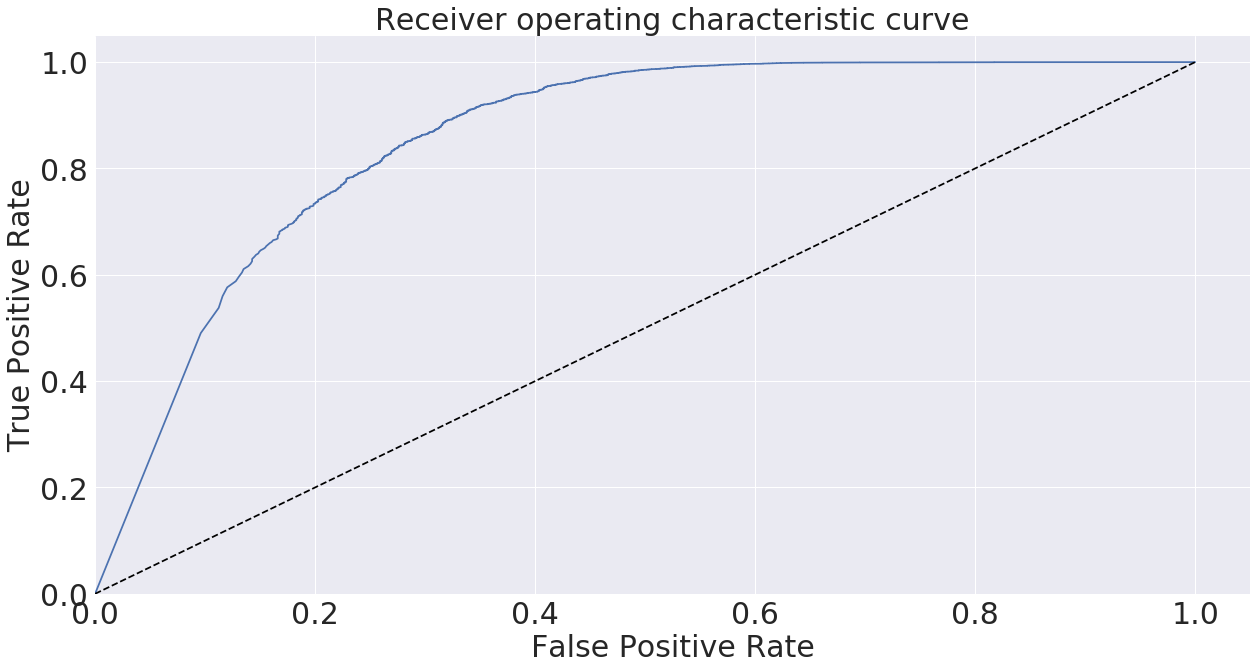

AUC: 0.856355


In [242]:
print('Generating results')
generate_results(y_test, y_pred)

In [244]:
#get model performance metrics
y_val_pred=model_cnn_densenet_1.predict_classes(X_test_exp)
get_improved_classification_metric(y_test, y_val_pred)

Calulating classificatio metric
Accuracy: 0.953301
Precision: 0.966192
Recall: 0.984498
F1 score: 0.975259


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


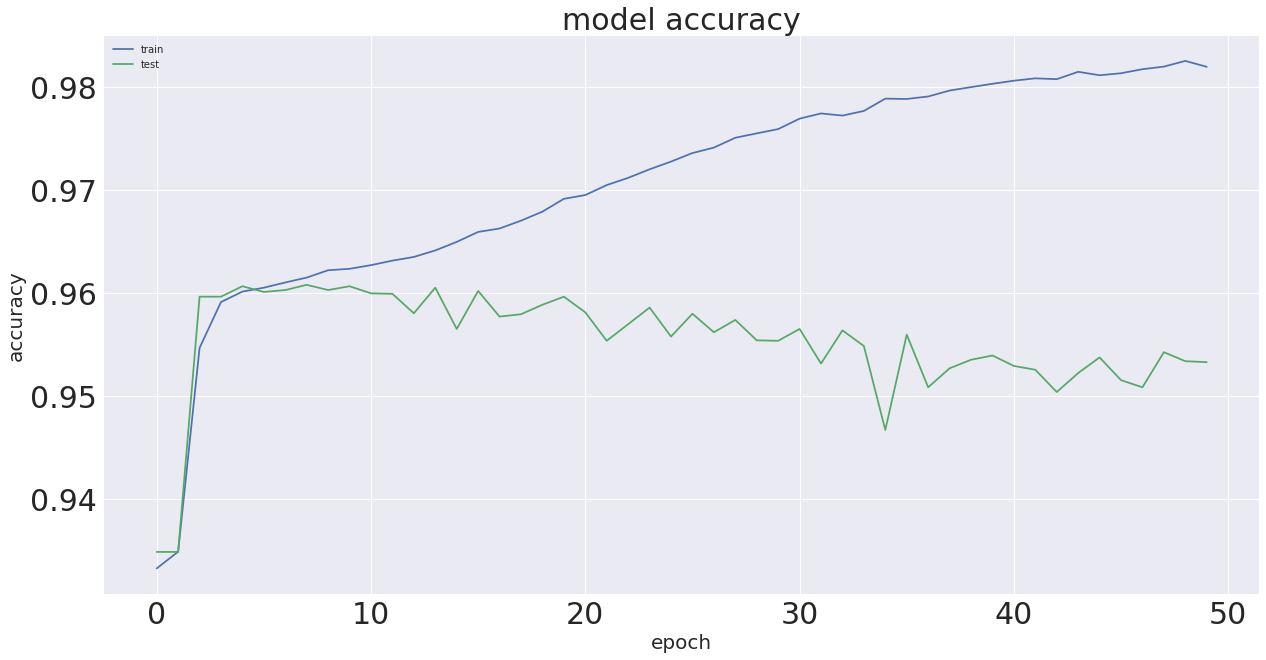

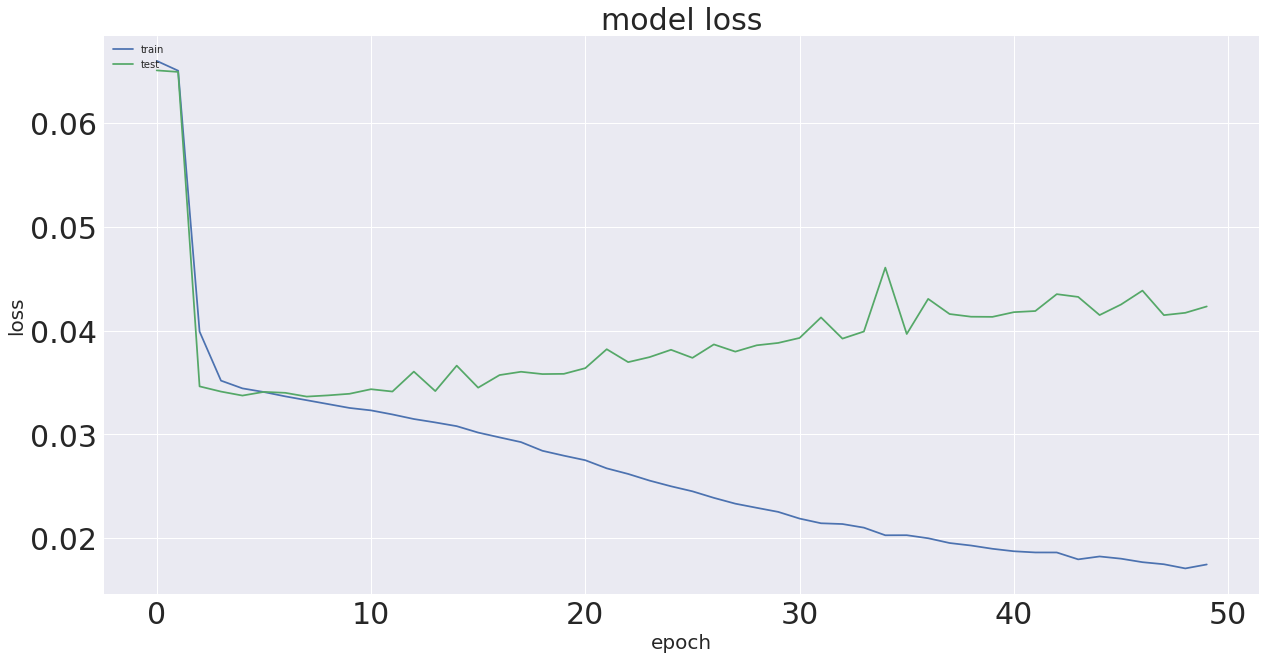

In [245]:
# list all data in history
print(history_densenet_1.history.keys())
# summarize history for accuracy
plt.plot(history_densenet_1.history['acc'])
plt.plot(history_densenet_1.history['val_acc'])
plt.title('model accuracy',fontsize=30)
plt.ylabel('accuracy',fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_densenet_1.history['loss'])
plt.plot(history_densenet_1.history['val_loss'])
plt.title('model loss',fontsize=30)
plt.ylabel('loss',fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [120]:
#get the trained densednet - model model_cnn_densenet_2
#from tensorflow import keras
model_cnn_densenet_2 = keras.models.load_model("model_cnn_densenet_2")

In [121]:
if model_cnn_densenet_2:
    print("model model_cnn_densenet_2 is loadded")

model model_cnn_densenet_2 is loadded


In [188]:
#CNN model with batch normalization - model 3
model_cnn_densenet_2 = Sequential()
# add first convolutional layer 1
#184302, 138
model_cnn_densenet_2.add(Conv1D(32, 
    kernel_size=3, 
    strides=nStride,
    input_shape=(X_train_exp.shape[1],1)))
# add pooling layer: here takes maximum of two consecutive values
model_cnn_densenet_2.add(BatchNormalization())
model_cnn_densenet_2.add(MaxPooling1D(pool_size=2))
model_cnn_densenet_2.add(Dropout(0.25))
# add second convolutional layer 2
model_cnn_densenet_2.add(Conv1D(64, 
    kernel_size=2, 
    strides=nStride,
    input_shape=(X_train_exp.shape[1],1)))
# add pooling layer: here takes maximum of two consecutive values
model_cnn_densenet_2.add(BatchNormalization())
model_cnn_densenet_2.add(MaxPooling1D(pool_size=2))
model_cnn_densenet_2.add(Dropout(0.25))

# linear layer - Solutions above are linearized to accommodate a standard layer
model_cnn_densenet_2.add(Flatten())
model_cnn_densenet_2.add(Dense(124))
model_cnn_densenet_2.add(LeakyReLU(alpha=0.1))
model_cnn_densenet_2.add(Dropout(0.25))
#classification layer
model_cnn_densenet_2.add(Dense(1))
model_cnn_densenet_2.add(Activation('sigmoid'))
#model_cnn_densenet_2.add(Dense(1))

In [168]:
#CNN model with batch normalization - model 4
model_cnn_densenet_2 = Sequential()
# add first convolutional layer 1
#184302, 138
#convolution layer 1
model_cnn_densenet_2.add(Conv1D(32, 
    kernel_size=3, 
    strides=nStride,
    input_shape=(X_train_exp.shape[1],1)))
model_cnn_densenet_2.add(BatchNormalization())
model_cnn_densenet_2.add(MaxPooling1D(pool_size=2))
#model_cnn_densenet_2.add(Dropout(0.25))

#dense block layer 2
model_cnn_densenet_2.add(Dense(128))
model_cnn_densenet_2.add(LeakyReLU(alpha=0.1))
model_cnn_densenet_2.add(Dropout(0.25))

# add second convolutional layer 3
model_cnn_densenet_2.add(Conv1D(64, 
    kernel_size=2, 
    strides=nStride,
    input_shape=(X_train_exp.shape[1],1)))
model_cnn_densenet_2.add(BatchNormalization())
model_cnn_densenet_2.add(MaxPooling1D(pool_size=2))
#model_cnn_densenet_2.add(Dropout(0.25))

#dense block layer 4
model_cnn_densenet_2.add(Dense(128))
model_cnn_densenet_2.add(LeakyReLU(alpha=0.1))
model_cnn_densenet_2.add(Dropout(0.25))

# linear layer - Solutions above are linearized to accommodate a standard layer
model_cnn_densenet_2.add(Flatten())
model_cnn_densenet_2.add(Dense(124))
model_cnn_densenet_2.add(LeakyReLU(alpha=0.1))
model_cnn_densenet_2.add(Dropout(0.25))
#classification layer
model_cnn_densenet_2.add(Dense(1))
model_cnn_densenet_2.add(Activation('sigmoid'))
#model_cnn_densenet_2.add(Dense(1))

In [197]:
# Model Compiling 
# Compile model
from keras.optimizers import SGD
from keras import backend as K
opt = SGD(lr=0.01, momentum=0.9, decay=0.01)
#model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#model.compile(loss= 'mean_squared_error',optimizer='Adam', metrics=['accuracy',percentage_difference])
model_cnn_densenet_2.compile(loss= 'mean_squared_error',optimizer='Adam', metrics=['accuracy'])

In [198]:
model_cnn_densenet_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 68, 32)            128       
_________________________________________________________________
batch_normalization_9 (Batch (None, 68, 32)            128       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 34, 32)            0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 34, 32)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 17, 64)            4160      
_________________________________________________________________
batch_normalization_10 (Batc (None, 17, 64)            256       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 8, 64)             0         
__________

In [199]:
# Training
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=10)
history_densenet_2 = model_cnn_densenet_2.fit(X_train_exp, y_train, epochs=50,batch_size=128,
                   validation_data=(X_test_exp, y_test), 
                   shuffle=True)

Train on 86937 samples, validate on 21735 samples
Epoch 1/50
86937/86937 [==============================] - 9s 102us/step - loss: 0.0433 - acc: 0.9506 - val_loss: 0.0362 - val_acc: 0.9574
Epoch 2/50
86937/86937 [==============================] - 7s 84us/step - loss: 0.0392 - acc: 0.9548 - val_loss: 0.0357 - val_acc: 0.9584
Epoch 3/50
86937/86937 [==============================] - 7s 83us/step - loss: 0.0381 - acc: 0.9562 - val_loss: 0.0357 - val_acc: 0.9582
Epoch 4/50
86937/86937 [==============================] - 7s 84us/step - loss: 0.0373 - acc: 0.9568 - val_loss: 0.0347 - val_acc: 0.9594
Epoch 5/50
86937/86937 [==============================] - 7s 83us/step - loss: 0.0367 - acc: 0.9579 - val_loss: 0.0344 - val_acc: 0.9599
Epoch 6/50
86937/86937 [==============================] - 7s 84us/step - loss: 0.0365 - acc: 0.9577 - val_loss: 0.0346 - val_acc: 0.9598
Epoch 7/50
86937/86937 [==============================] - 7s 84us/step - loss: 0.0363 - acc: 0.9578 - val_loss: 0.0342 - val_ac

In [167]:
model_cnn_densenet_2.save("densenet_2_with_batch_size_128.H5")
print('saving densenet_2_with_batch_size_128.H5 done')

saving model_cnn_densenet_2_with_batch_size_128.H5 done


In [181]:
model_cnn_densenet_2 = keras.models.load_model("densenet_2_with_batch_size_128.H5")

In [191]:
from sklearn.metrics import classification_report
y_val_pred=model_cnn_densenet_2.predict_classes(X_test_exp)
print(type(y_val_pred))
print(classification_report(y_test, y_val_pred))

<class 'numpy.ndarray'>
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1415
         1.0       0.93      1.00      0.97     20320

    accuracy                           0.93     21735
   macro avg       0.47      0.50      0.48     21735
weighted avg       0.87      0.93      0.90     21735



/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [200]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def get_improved_classification_metric(testy, probs):
    print('Calulating classificatio metric')
    y_pred= probs
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(testy, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(testy, y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(testy, y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(testy, y_pred)
    print('F1 score: %f' % f1)

In [201]:
#get model performance metrics
y_val_pred=model_cnn_densenet_2.predict_classes(X_test_exp)
#get_classification_metric(y_test, y_val_pred)
get_improved_classification_metric(y_test, y_val_pred)

Calulating classificatio metric
Accuracy: 0.960801
Precision: 0.964364
Recall: 0.994833
F1 score: 0.979361


In [202]:
y_pred=model_cnn_densenet_2.predict(X_test_exp)

In [203]:
y_val_pred.shape

(21735, 1)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


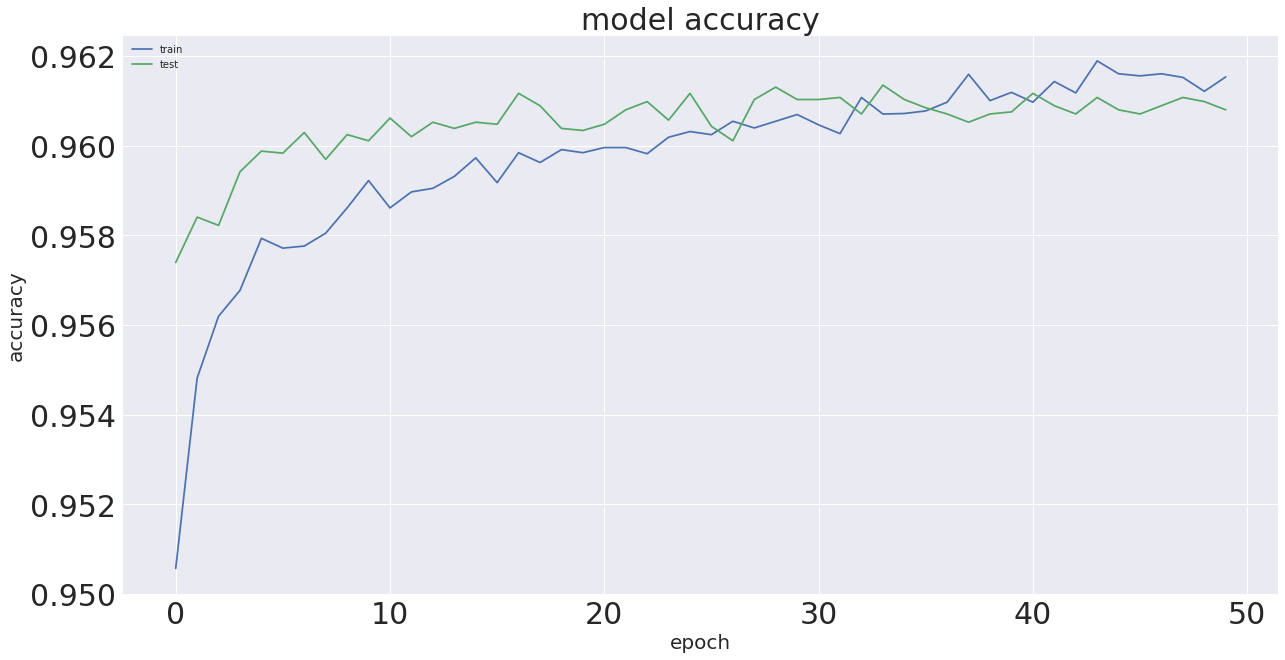

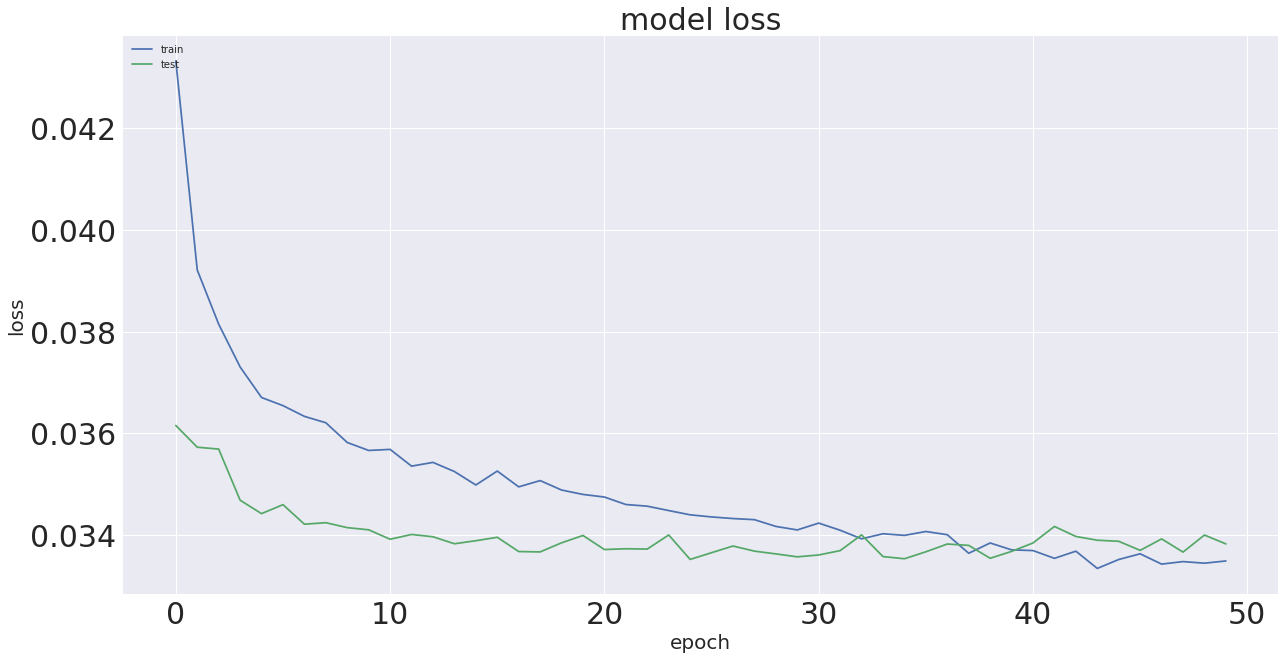

In [204]:
# list all data in history
print(history_densenet_2.history.keys())
# summarize history for accuracy
plt.plot(history_densenet_2.history['acc'])
plt.plot(history_densenet_2.history['val_acc'])
plt.title('model accuracy',fontsize=30)
plt.ylabel('accuracy',fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_densenet_2.history['loss'])
plt.plot(history_densenet_2.history['val_loss'])
plt.title('model loss',fontsize=30)
plt.ylabel('loss',fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Generating results


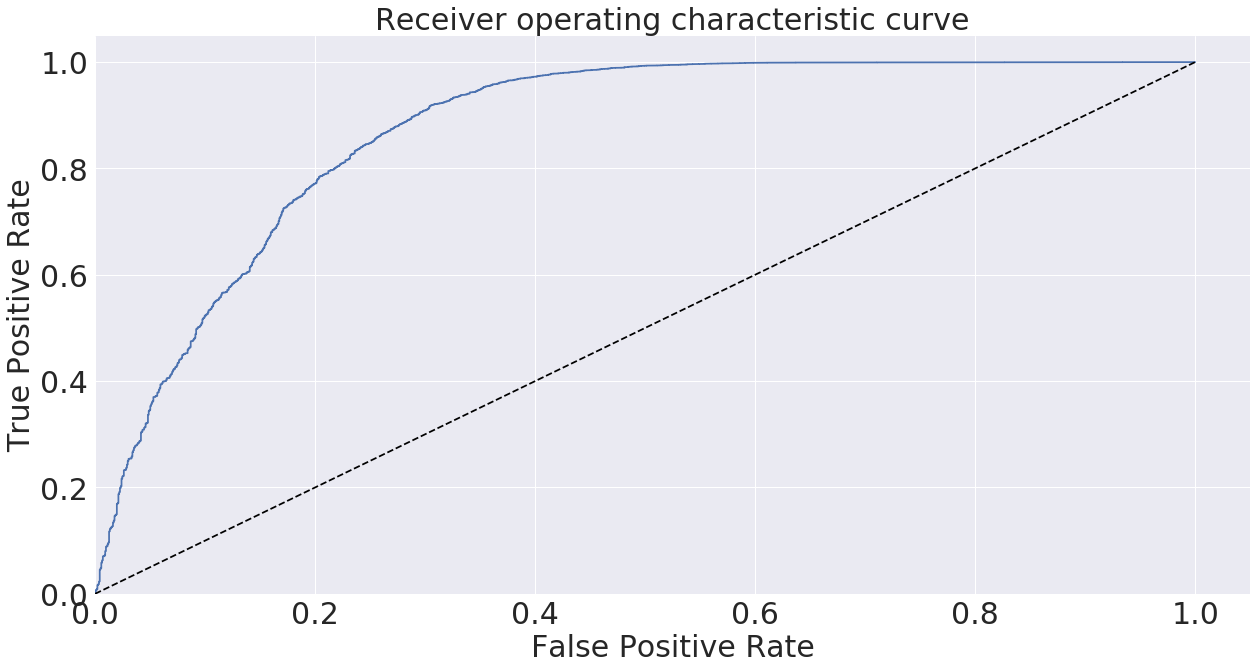

AUC: 0.873460


In [205]:
print('Generating results')
generate_results(y_test, y_pred)

In [129]:
# all resnet models starts here
#resnet model 18
#expand the loan data dimension from lower(1 D) to higher (2D) for CNN input layer
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping

import numpy as np
import resnet

X_train_exp = np.expand_dims(X_train, axis=2)
X_test_exp = np.expand_dims(X_test, axis=2)
y_train_exp = np.expand_dims(y_train, axis=2)
y_test_exp = np.expand_dims(y_test, axis=2)
#print(X_test_exp.shape[0])
#print(X_test_exp.shape[1])
#print(X_test_exp.shape[2])
Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)

X_train_new = np.reshape(X_train_exp,(X_train_exp.shape[0],1,X_train_exp.shape[1],1))
X_test_new = np.reshape(X_test_exp,(X_test_exp.shape[0],1,  X_test_exp.shape[1],1))

y_train_new = np.reshape(y_train_exp,(y_train_exp.shape[0], y_train_exp.shape[1]))
y_test_new = np.reshape(y_test_exp,(y_test_exp.shape[0], y_test_exp.shape[1]))
print("X_train_exp.shape" ,X_train_exp.shape)
print("y_train_exp.shape)",y_train_exp.shape)
print("X_train_new.shape)",X_train_new.shape)
print("y_train_new.shape=",y_train_new.shape)
#print(y_train_new)


X_train_exp.shape (86937, 138, 1)
y_train_exp.shape) (86937, 1)
X_train_new.shape) (86937, 1, 138, 1)
y_train_new.shape= (86937, 1)


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  if sys.path[0] == '':
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  del sys.path[0]


In [130]:
#X_train_new
#print("",type(y_train_new[(0][0]))
y_train[0:5]
y_test[0:5]

91773    1.0
19966    1.0
2330     1.0
83986    1.0
12552    1.0
Name: good_loan, dtype: float64

In [131]:
print(np.any(np.isnan(X_test)))
print(np.any(np.isnan(X_test_exp)))
print(np.any(np.isnan(y_test)))


False
False
False


In [197]:
#model with ResNet-18

data_rows=len(X_train)
data_cols=len(X_train.columns)
print('rows of X_train',len(X_train))
print('cols  of X_train',len(X_train.columns))
resnet_model = resnet.ResnetBuilder.build_resnet_18((1,1,X_train_exp.shape[1]), 2)
#resnet_model = resnet.ResnetBuilder.build_resnet_18((1,1,256), 2)

rows of X_train 86937
cols  of X_train 138


In [198]:
# Model Compiling 
# Compile model
import tensorflow as tf
from keras.optimizers import SGD
from keras.optimizers import adam
from keras import backend as K
from tensorflow.keras import layers
opt = SGD(lr=0.01, momentum=0.9, decay=0.01)
#optimizer = tf.keras.optimizers.Adam(lr=params['learning_rate'])
#model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#model.compile(loss= 'mean_squared_error',optimizer='Adam', metrics=['accuracy',percentage_difference])
#model.compile(loss= 'mean_squared_error',optimizer='Adam', metrics=['accuracy'])
opt = adam(lr=0.001, decay=1e-6)
resnet_model.compile(loss= 'sparse_categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
#resnet_model.compile(loss= 'sparse_categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])

In [199]:
# list some properties of the network
resnet_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 1, 138, 1)    0                                            
__________________________________________________________________________________________________
conv2d_143 (Conv2D)             (None, 1, 69, 64)    3200        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_132 (BatchN (None, 1, 69, 64)    256         conv2d_143[0][0]                 
__________________________________________________________________________________________________
activation_132 (Activation)     (None, 1, 69, 64)    0           batch_normalization_132[0][0]    
__________________________________________________________________________________________________
max_poolin

In [200]:
# Training
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=10)
history_resnet = resnet_model.fit(X_train_new, y_train, epochs=50, batch_size = 128,
                   validation_data=(X_test_new, y_test),
                   shuffle=True,
                    callbacks=[lr_reducer])
#resnet_model.fit(X_train_new, y_train_new,
#              batch_size=32,
#              epochs=50,
#              validation_data=(X_test_new, y_test_new),
#              callbacks=[lr_reducer, early_stopper])

Train on 86937 samples, validate on 21735 samples
Epoch 1/50
86937/86937 [==============================] - 91s 1ms/step - loss: 0.4014 - acc: 0.9512 - val_loss: 0.2667 - val_acc: 0.9537
Epoch 2/50
86937/86937 [==============================] - 79s 911us/step - loss: 0.2118 - acc: 0.9572 - val_loss: 0.1832 - val_acc: 0.9602
Epoch 3/50
86937/86937 [==============================] - 79s 912us/step - loss: 0.1749 - acc: 0.9579 - val_loss: 0.1633 - val_acc: 0.9601
Epoch 4/50
86937/86937 [==============================] - 79s 909us/step - loss: 0.1648 - acc: 0.9583 - val_loss: 0.1668 - val_acc: 0.9602
Epoch 5/50
86937/86937 [==============================] - 79s 911us/step - loss: 0.1605 - acc: 0.9587 - val_loss: 0.1728 - val_acc: 0.9566
Epoch 6/50
86937/86937 [==============================] - 79s 909us/step - loss: 0.1588 - acc: 0.9582 - val_loss: 0.1767 - val_acc: 0.9516
Epoch 7/50
86937/86937 [==============================] - 79s 910us/step - loss: 0.1558 - acc: 0.9590 - val_loss: 0.16

In [201]:
# save the resnet 18 trained model for future reference
resnet_model.save("resnet_18_model_with_batch_size_128.H5")


In [164]:
#get the trained model of resnet
from tensorflow import keras
loaded_resnet_model = keras.models.load_model("resnet_18_model_with_batch_size_128.H5")

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`


In [202]:
loaded_resnet_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 1, 138, 1)    0                                            
__________________________________________________________________________________________________
conv2d_143 (Conv2D)             (None, 1, 69, 64)    3200        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_132 (BatchN (None, 1, 69, 64)    256         conv2d_143[0][0]                 
__________________________________________________________________________________________________
activation_132 (Activation)     (None, 1, 69, 64)    0           batch_normalization_132[0][0]    
__________________________________________________________________________________________________
max_poolin

In [203]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def get_improved_classification_metric_resnet(testy, probs):
    print('Calulating classificatio metric')
    y_pred= probs[:,1]
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(testy, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(testy, y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(testy, y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(testy, y_pred)
    print('F1 score: %f' % f1)

In [204]:
#get resnet model performance metrics
from keras.applications.imagenet_utils import decode_predictions 
predictions = loaded_resnet_model.predict(X_test_new) 
#y_pred =(predictions>0.5)
y_pred =  (predictions>0.5) 
y_pred = y_pred.astype(int)
type(y_pred)
#label = decode_predictions(predictions)
#get_classification_metric_resnet(y_test, y_pred)

numpy.ndarray

In [205]:
#get classificaiton metric of ResNet-18
get_improved_classification_metric_resnet(y_test, y_pred)

Calulating classificatio metric
Accuracy: 0.959926
Precision: 0.965889
Recall: 0.992175
F1 score: 0.978856


In [132]:
y_pred

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

In [138]:
#confusion matrix ResNet-18
print(classification_report(y_test, y_pred[:,1]))

              precision    recall  f1-score   support

         0.0       0.82      0.50      0.62      1415
         1.0       0.97      0.99      0.98     20320

    accuracy                           0.96     21735
   macro avg       0.89      0.74      0.80     21735
weighted avg       0.96      0.96      0.96     21735



In [142]:
#confusion matrix ResNet-18
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, np.argmax(y_pred, axis=-1))

array([[  703,   712],
       [  159, 20161]])

Generating results


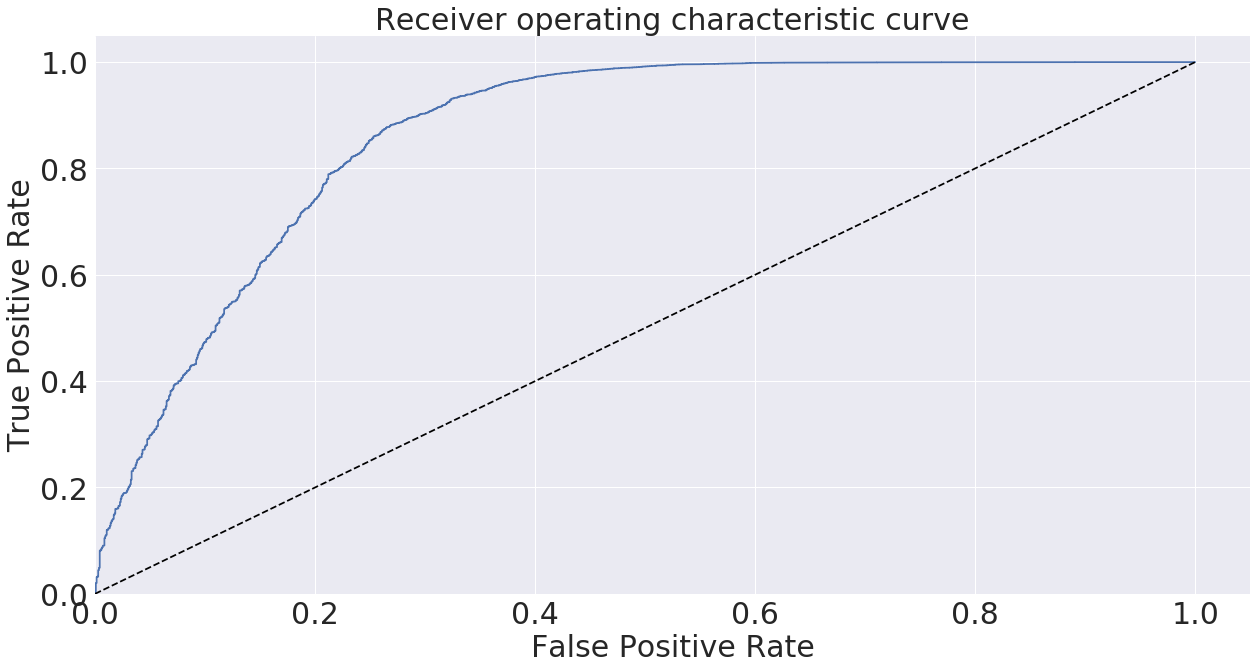

AUC: 0.865967


In [206]:
print('Generating results')
generate_results(y_test, predictions[:,1])

In [143]:
print(type(y_pred))
#print(classification_report(y_test, y_pred))

<class 'numpy.ndarray'>


In [195]:
# evaluate the model
scores_resnset = loaded_resnet_model.evaluate(X_train_new, y_train)
print("\n%s: %.2f%%" % (loaded_resnet_model.metrics_names[1], scores_resnset[1]*100))

86937/86937 [==============================] - 36s 417us/step

acc: 96.57%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


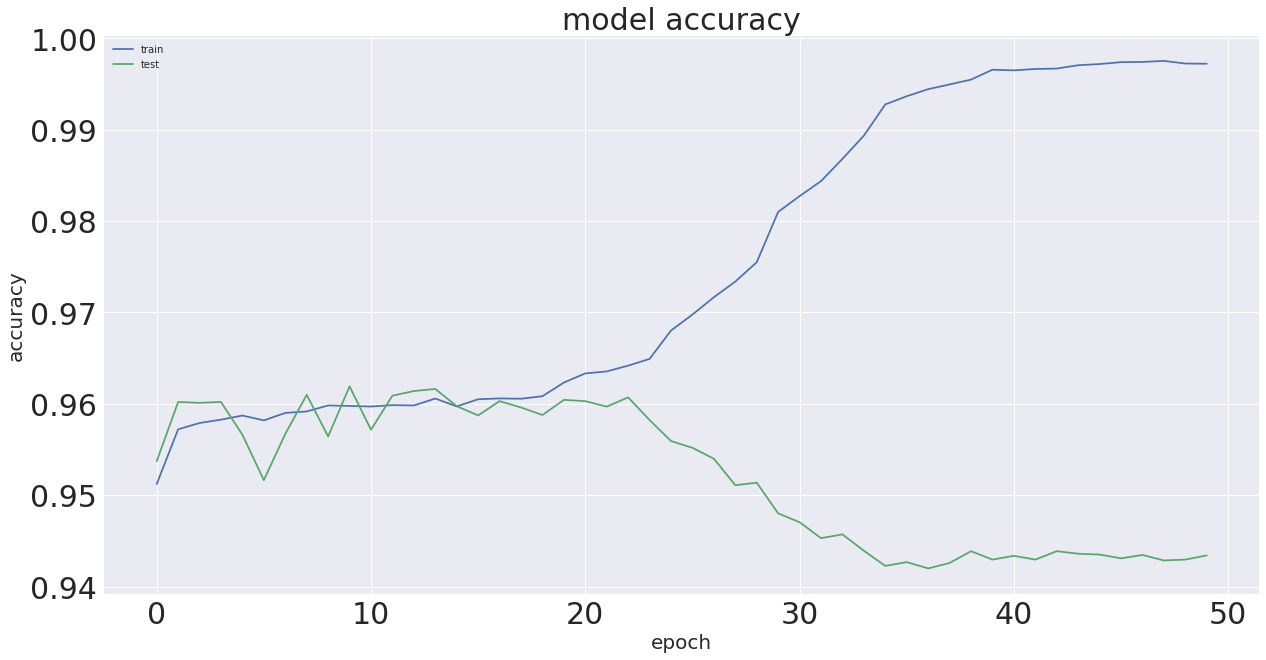

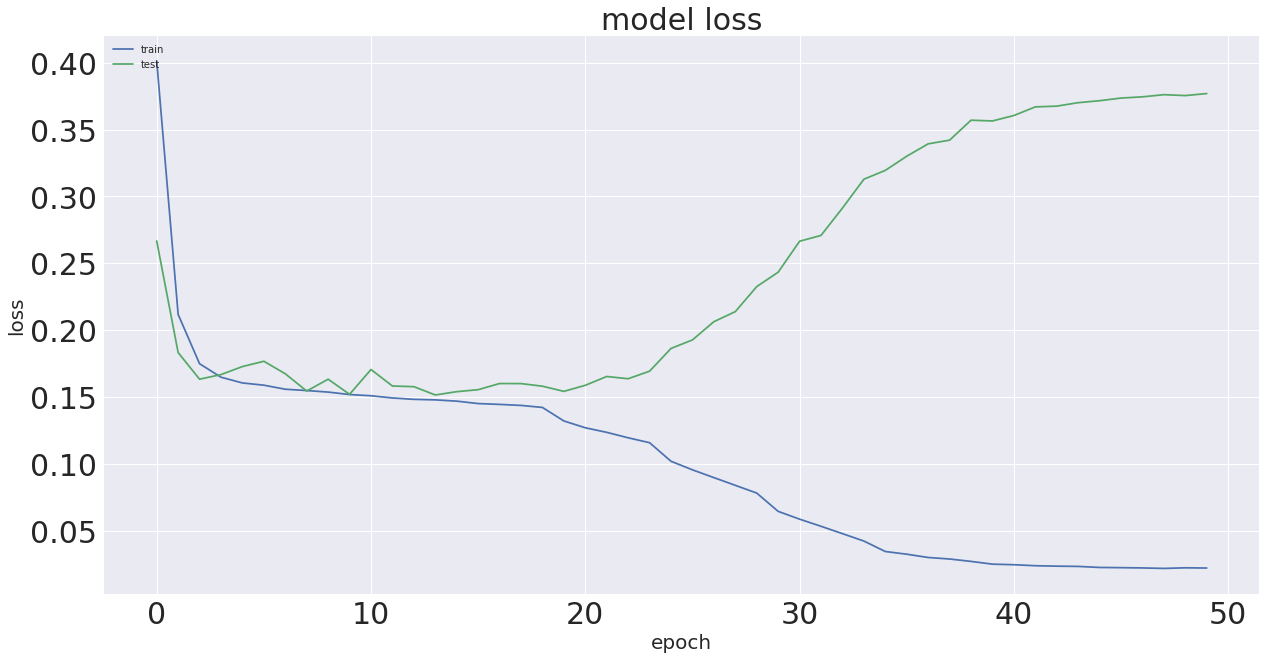

In [208]:
# list all data in history
print(history_resnet.history.keys())
# summarize history for accuracy
plt.plot(history_resnet.history['acc'])
plt.plot(history_resnet.history['val_acc'])
plt.title('model accuracy',fontsize=30)
plt.ylabel('accuracy',fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('model loss',fontsize=30)
plt.ylabel('loss',fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [164]:
#profile resnet 18 and visualize results
from util import profile
# analyze FLOPS
layer_name, layer_flops, inshape, weights = profile(resnet_model)

In [165]:
# visualize results
for name, flop, shape, weight in zip(layer_name, layer_flops, inshape, weights):
    print("layer:", name, shape, " MegaFLOPS:", flop/1e6, " MegaWeights:", weight/1e6)

layer: conv2d_1 (None, 1, 138, 1)  MegaFLOPS: 0.432832  MegaWeights: 0.0032
layer: conv2d_2 (None, 1, 35, 64)  MegaFLOPS: 2.580544  MegaWeights: 0.036928
layer: conv2d_3 (None, 1, 35, 64)  MegaFLOPS: 2.580544  MegaWeights: 0.036928
layer: conv2d_4 (None, 1, 35, 64)  MegaFLOPS: 2.580544  MegaWeights: 0.036928
layer: conv2d_5 (None, 1, 35, 64)  MegaFLOPS: 2.580544  MegaWeights: 0.036928
layer: conv2d_6 (None, 1, 35, 64)  MegaFLOPS: 2.654336  MegaWeights: 0.073856
layer: conv2d_8 (None, 1, 35, 64)  MegaFLOPS: 0.29504  MegaWeights: 0.00832
layer: conv2d_7 (None, 1, 18, 128)  MegaFLOPS: 5.308544  MegaWeights: 0.147584
layer: conv2d_9 (None, 1, 18, 128)  MegaFLOPS: 5.308544  MegaWeights: 0.147584
layer: conv2d_10 (None, 1, 18, 128)  MegaFLOPS: 5.308544  MegaWeights: 0.147584
layer: conv2d_11 (None, 1, 18, 128)  MegaFLOPS: 5.308672  MegaWeights: 0.295168
layer: conv2d_13 (None, 1, 18, 128)  MegaFLOPS: 0.59008  MegaWeights: 0.033024
layer: conv2d_12 (None, 1, 9, 256)  MegaFLOPS: 10.617088  Meg

In [132]:
#model with ResNet-34

data_rows=len(X_train)
data_cols=len(X_train.columns)
print('rows of X_train',len(X_train))
print('cols  of X_train',len(X_train.columns))
resnet_model_34 = resnet.ResnetBuilder.build_resnet_34((1,1,X_train_exp.shape[1]), 2)
#resnet_model = resnet.ResnetBuilder.build_resnet_18((1,1,256), 2)

rows of X_train 86937
cols  of X_train 138


In [133]:
# Model Compiling resnet 34 network
# Compile model

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=10)

import tensorflow as tf
from keras.optimizers import SGD
from keras.optimizers import adam
from keras import backend as K
from tensorflow.keras import layers
opt = SGD(lr=0.01, momentum=0.9, decay=0.01)
#optimizer = tf.keras.optimizers.Adam(lr=params['learning_rate'])
#model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#model.compile(loss= 'mean_squared_error',optimizer='Adam', metrics=['accuracy',percentage_difference])
#model.compile(loss= 'mean_squared_error',optimizer='Adam', metrics=['accuracy'])
opt = adam(lr=0.001, decay=1e-6)
resnet_model_34.compile(loss= 'sparse_categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
#resnet_model.compile(loss= 'sparse_categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])

In [134]:
# list some properties of the model resnet 34 network
# Model Compiling 
resnet_model_34.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 138, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 1, 69, 64)    3200        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 1, 69, 64)    256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 1, 69, 64)    0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

In [136]:
# Training resnet 34 network
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=10)
history_resnet_34 = resnet_model_34.fit(X_train_new, y_train, epochs=50, batch_size=128,
                   validation_data=(X_test_new, y_test),
                   shuffle=True,
                  callbacks=[lr_reducer])
#                    callbacks=[lr_reducer, early_stopper])

Train on 86937 samples, validate on 21735 samples
Epoch 1/50
86937/86937 [==============================] - 163s 2ms/step - loss: 0.4663 - acc: 0.9529 - val_loss: 0.2526 - val_acc: 0.9594
Epoch 2/50
86937/86937 [==============================] - 137s 2ms/step - loss: 0.2123 - acc: 0.9565 - val_loss: 0.1964 - val_acc: 0.9547
Epoch 3/50
86937/86937 [==============================] - 137s 2ms/step - loss: 0.1768 - acc: 0.9572 - val_loss: 0.1802 - val_acc: 0.9546
Epoch 4/50
86937/86937 [==============================] - 137s 2ms/step - loss: 0.1681 - acc: 0.9580 - val_loss: 0.1751 - val_acc: 0.9564
Epoch 5/50
86937/86937 [==============================] - 137s 2ms/step - loss: 0.1655 - acc: 0.9583 - val_loss: 0.1700 - val_acc: 0.9552
Epoch 6/50
86937/86937 [==============================] - 137s 2ms/step - loss: 0.1589 - acc: 0.9594 - val_loss: 0.1629 - val_acc: 0.9577
Epoch 7/50
86937/86937 [==============================] - 137s 2ms/step - loss: 0.1587 - acc: 0.9588 - val_loss: 0.1615 - 

In [138]:
# save the resnet 34 trained model for future reference
resnet_model_34.save("resnet_model_34.H5")


In [163]:
#get the pre-trained model ResNet-34
resnet_model_34 = keras.models.load_model("resnet_model_34.H5")

In [144]:
def get_classification_metric_resnet(testy, probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(testy, probs[:,0])
    ix_precision = np.argmax(precision)
    precision_val = np.average(precision)
    print("precision=",precision)
    ix_recall = np.argmax(recall)
    recall_val = np.average(recall)
    print("recall=",recall)
    print("thresholds=",thresholds)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print("fscore",fscore[ix])
    return fscore[ix]

In [183]:
#get resnet 34 performance metrics
from keras.applications.imagenet_utils import decode_predictions 
predictions = resnet_model_34.predict(X_test_new) 
#y_pred =(predictions>0.5)
y_pred =  (predictions>0.5) 
y_pred = y_pred.astype(int)
type(y_pred)
#label = decode_predictions(predictions)


numpy.ndarray

In [184]:
#get resnet 34 performance metrics
get_classification_metric_resnet(y_test, y_pred)

precision= [0.93489763 0.4207961  1.        ]
recall= [1.         0.02549213 0.        ]
thresholds= [0 1]
fscore 0.9663535845916063


0.9663535845916063

In [185]:
#Confusion Matrix ResNet-34
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred[:,1]))

              precision    recall  f1-score   support

         0.0       0.58      0.50      0.54      1415
         1.0       0.97      0.97      0.97     20320

    accuracy                           0.94     21735
   macro avg       0.77      0.74      0.75     21735
weighted avg       0.94      0.94      0.94     21735



In [186]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def get_improved_classification_metric_resnet(testy, probs):
    print('Calulating classificatio metric')
    y_pred= probs[:,1]
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(testy, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(testy, y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(testy, y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(testy, y_pred)
    print('F1 score: %f' % f1)

In [187]:
get_improved_classification_metric_resnet(y_test, y_pred)

Calulating classificatio metric
Accuracy: 0.943869
Precision: 0.965763
Recall: 0.974508
F1 score: 0.970116


Generating results


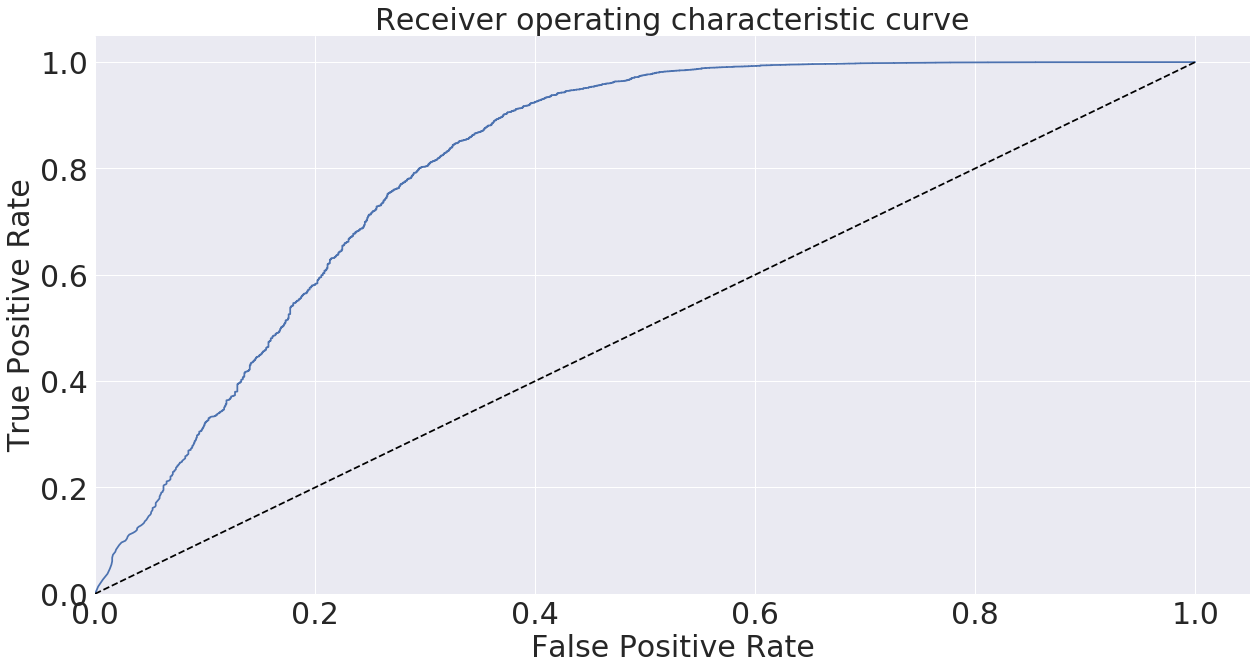

AUC: 0.811965


In [188]:
print('Generating results')
generate_results(y_test, predictions[:,1])

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


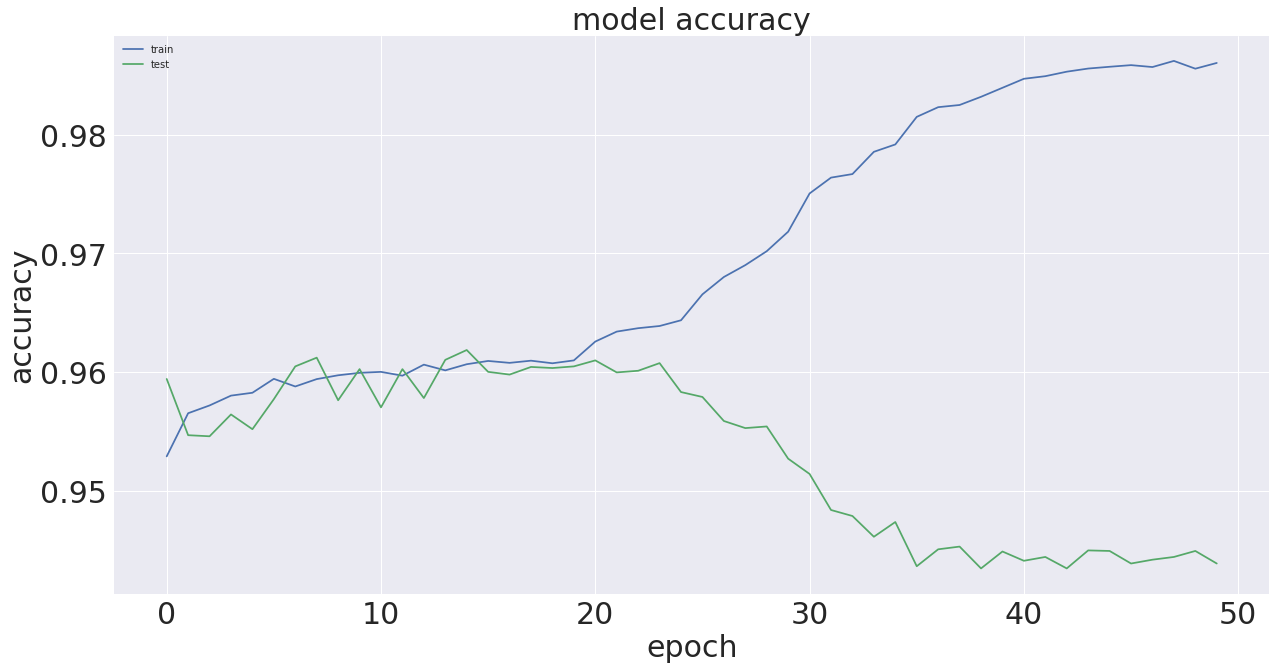

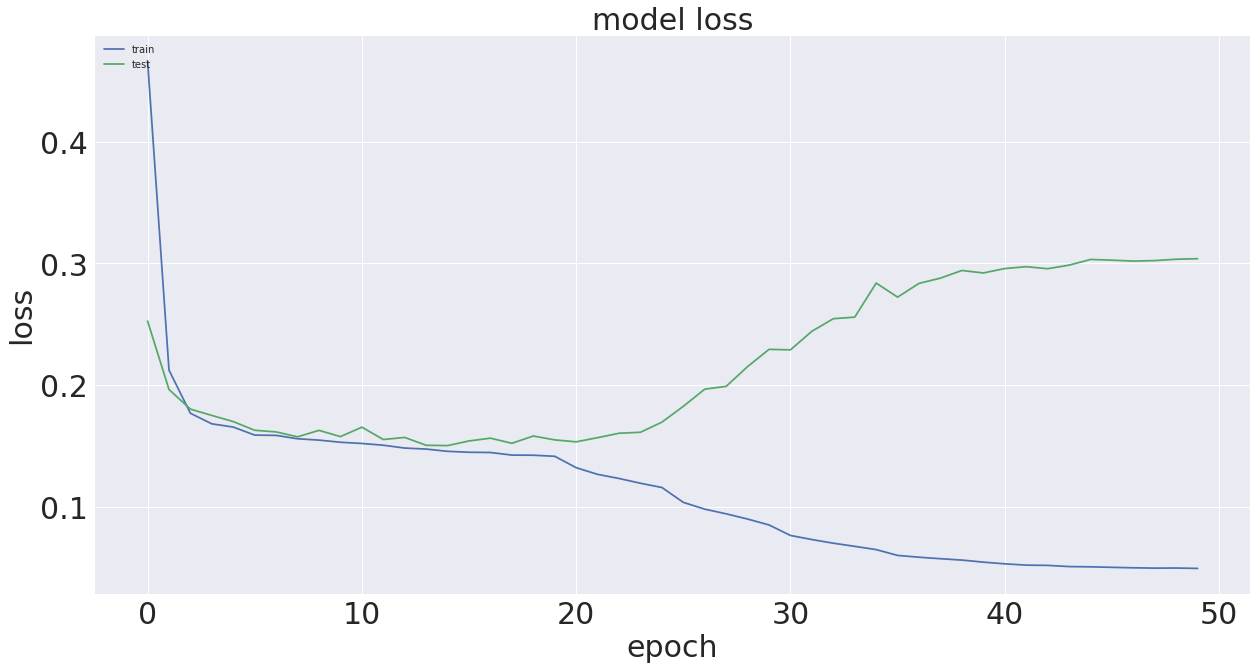

In [189]:
# list all data in history
print(history_resnet_34.history.keys())
# summarize history for accuracy
plt.plot(history_resnet_34.history['acc'])
plt.plot(history_resnet_34.history['val_acc'])
plt.title('model accuracy',fontsize=30)
plt.ylabel('accuracy',fontsize=30)
plt.xlabel('epoch',fontsize=30)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_resnet_34.history['loss'])
plt.plot(history_resnet_34.history['val_loss'])
plt.title('model loss',fontsize=30)
plt.ylabel('loss',fontsize=30)
plt.xlabel('epoch',fontsize=30)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [171]:
#model with resnet 50

from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping

import numpy as np
import resnet

X_train_exp = np.expand_dims(X_train, axis=2)
X_test_exp = np.expand_dims(X_test, axis=2)
y_train_exp = np.expand_dims(y_train, axis=2)
y_test_exp = np.expand_dims(y_test, axis=2)
#print(X_test_exp.shape[0])
#print(X_test_exp.shape[1])
#print(X_test_exp.shape[2])
Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)

X_train_new = np.reshape(X_train_exp,(X_train_exp.shape[0],1,X_train_exp.shape[1],1))
X_test_new = np.reshape(X_test_exp,(X_test_exp.shape[0],1,  X_test_exp.shape[1],1))

y_train_new = np.reshape(y_train_exp,(y_train_exp.shape[0], y_train_exp.shape[1]))
y_test_new = np.reshape(y_test_exp,(y_test_exp.shape[0], y_test_exp.shape[1]))
print("X_train_exp.shape" ,X_train_exp.shape)
print("y_train_exp.shape)",y_train_exp.shape)
print("X_train_new.shape)",X_train_new.shape)
print("y_train_new.shape=",y_train_new.shape)
#print(y_train_new)


X_train_exp.shape (86937, 138, 1)
y_train_exp.shape) (86937, 1)
X_train_new.shape) (86937, 1, 138, 1)
y_train_new.shape= (86937, 1)


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  # This is added back by InteractiveShellApp.init_path()
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  if sys.path[0] == '':


In [172]:
#model with resnet 50

data_rows=len(X_train)
data_cols=len(X_train.columns)
print('rows of X_train',len(X_train))
print('cols  of X_train',len(X_train.columns))
resnet_model_50 = resnet.ResnetBuilder.build_resnet_50((1,1,X_train_exp.shape[1]), 2)
#resnet_model = resnet.ResnetBuilder.build_resnet_50((1,1,256), 2)

rows of X_train 86937
cols  of X_train 138


In [173]:
# Model Compiling resnet 34 network
# Compile model

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=10)

import tensorflow as tf
from keras.optimizers import SGD
from keras.optimizers import adam
from keras import backend as K
from tensorflow.keras import layers
opt = SGD(lr=0.01, momentum=0.9, decay=0.01)
#optimizer = tf.keras.optimizers.Adam(lr=params['learning_rate'])
#model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#model.compile(loss= 'mean_squared_error',optimizer='Adam', metrics=['accuracy',percentage_difference])
#model.compile(loss= 'mean_squared_error',optimizer='Adam', metrics=['accuracy'])
opt = adam(lr=0.001, decay=1e-6)
resnet_model_50.compile(loss= 'sparse_categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
#resnet_model.compile(loss= 'sparse_categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])

In [174]:
#resnet 50 model summary
resnet_model_50.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 1, 138, 1)    0                                            
__________________________________________________________________________________________________
conv2d_90 (Conv2D)              (None, 1, 69, 64)    3200        input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_83 (BatchNo (None, 1, 69, 64)    256         conv2d_90[0][0]                  
__________________________________________________________________________________________________
activation_83 (Activation)      (None, 1, 69, 64)    0           batch_normalization_83[0][0]     
__________________________________________________________________________________________________
max_poolin

In [175]:
# Training resnet 50 network
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=10)
history_resnet_50 = resnet_model_50.fit(X_train_new, y_train, epochs=50, batch_size=128,
                   validation_data=(X_test_new, y_test),
                   shuffle=True,
                  callbacks=[lr_reducer])
#                    callbacks=[lr_reducer, early_stopper])

Train on 86937 samples, validate on 21735 samples
Epoch 1/50
86937/86937 [==============================] - 204s 2ms/step - loss: 1.2709 - acc: 0.9504 - val_loss: 0.3778 - val_acc: 0.9456
Epoch 2/50
86937/86937 [==============================] - 178s 2ms/step - loss: 0.2663 - acc: 0.9539 - val_loss: 0.2148 - val_acc: 0.9569
Epoch 3/50
86937/86937 [==============================] - 178s 2ms/step - loss: 0.2069 - acc: 0.9545 - val_loss: 0.1995 - val_acc: 0.9466
Epoch 4/50
86937/86937 [==============================] - 178s 2ms/step - loss: 0.1925 - acc: 0.9543 - val_loss: 0.2037 - val_acc: 0.9435
Epoch 5/50
86937/86937 [==============================] - 178s 2ms/step - loss: 0.1819 - acc: 0.9557 - val_loss: 0.2292 - val_acc: 0.9416
Epoch 6/50
86937/86937 [==============================] - 178s 2ms/step - loss: 0.1770 - acc: 0.9563 - val_loss: 0.1681 - val_acc: 0.9599
Epoch 7/50
86937/86937 [==============================] - 178s 2ms/step - loss: 0.1738 - acc: 0.9568 - val_loss: 0.1866 - 

In [176]:
# save the resnet 50 trained model for future reference
resnet_model_50.save("resnet_model_50.H5")


In [143]:
resnet_model_50 = keras.models.load_model("resnet_model_50.H5")

In [177]:
#get resnet 50 performance metrics
from keras.applications.imagenet_utils import decode_predictions 
predictions = resnet_model_50.predict(X_test_new) 
#y_pred =(predictions>0.5)
y_pred =  (predictions>0.5) 
y_pred = y_pred.astype(int)
type(y_pred)
#label = decode_predictions(predictions)
#get_classification_metric_resnet(y_test, y_pred)

numpy.ndarray

In [178]:
get_improved_classification_metric_resnet(y_test, y_pred)

Calulating classificatio metric
Accuracy: 0.948608
Precision: 0.964626
Recall: 0.981004
F1 score: 0.972746


In [179]:
#confusion matrix ResNet-50
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred[:,1]))

              precision    recall  f1-score   support

         0.0       0.64      0.48      0.55      1415
         1.0       0.96      0.98      0.97     20320

    accuracy                           0.95     21735
   macro avg       0.80      0.73      0.76     21735
weighted avg       0.94      0.95      0.95     21735



Generating results


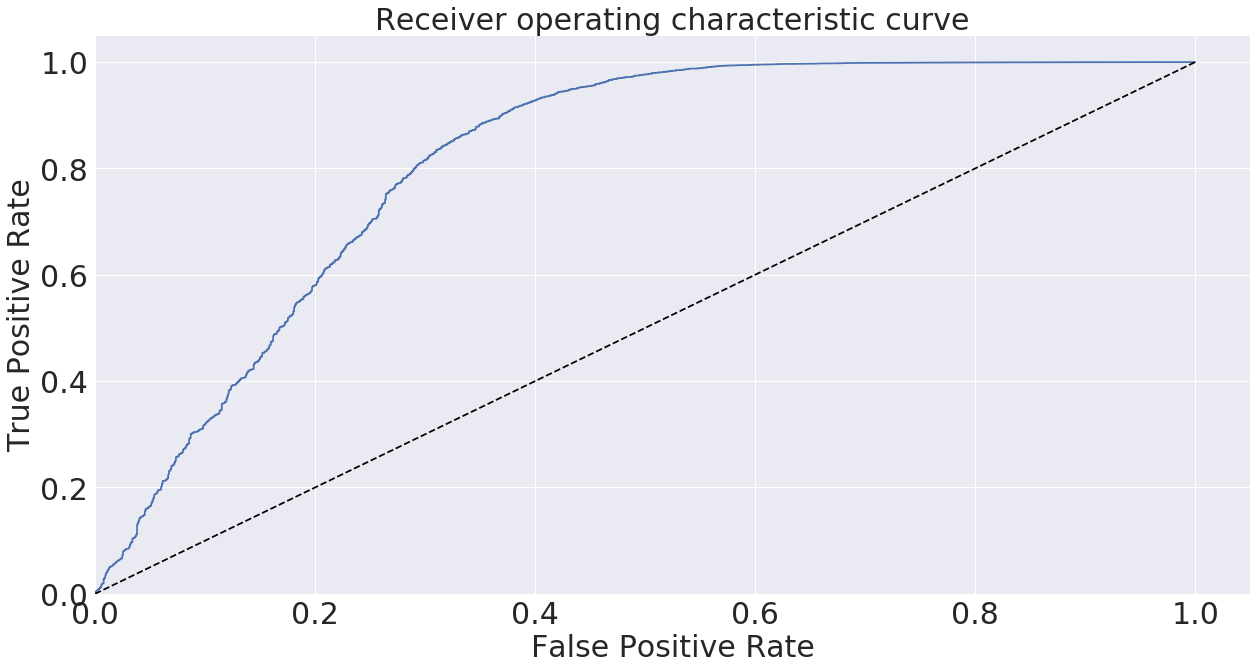

AUC: 0.813377


In [180]:
print('Generating results')
generate_results(y_test, predictions[:,1])

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


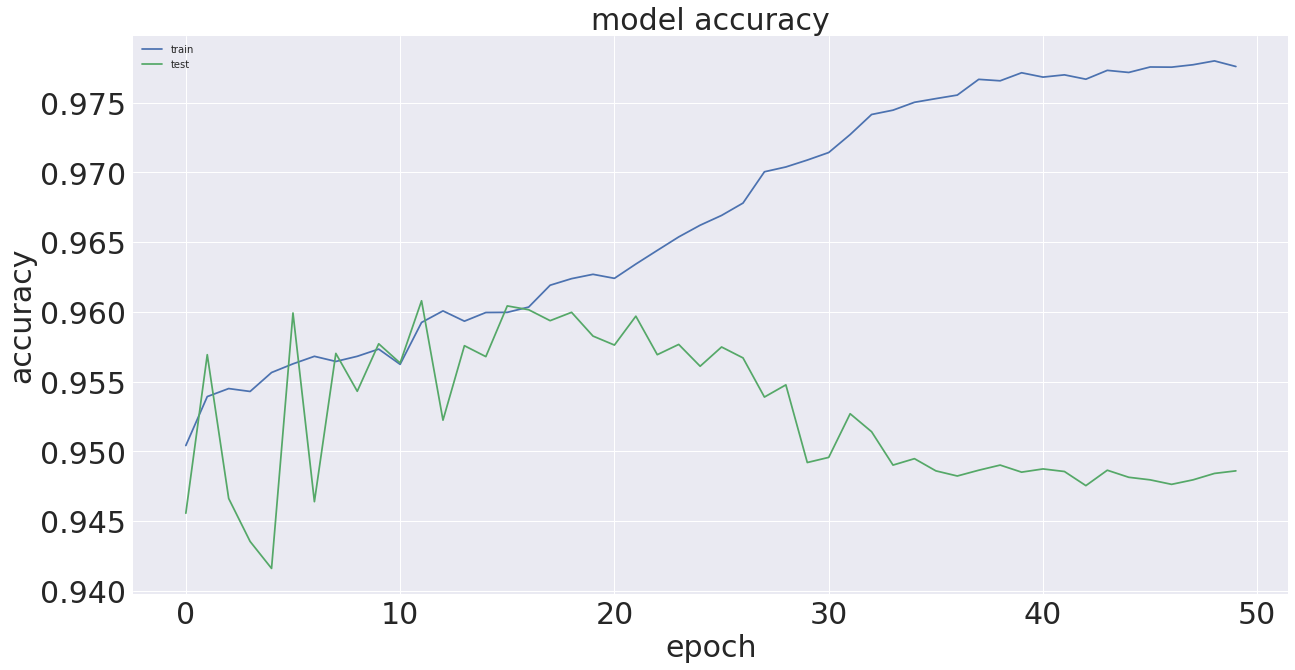

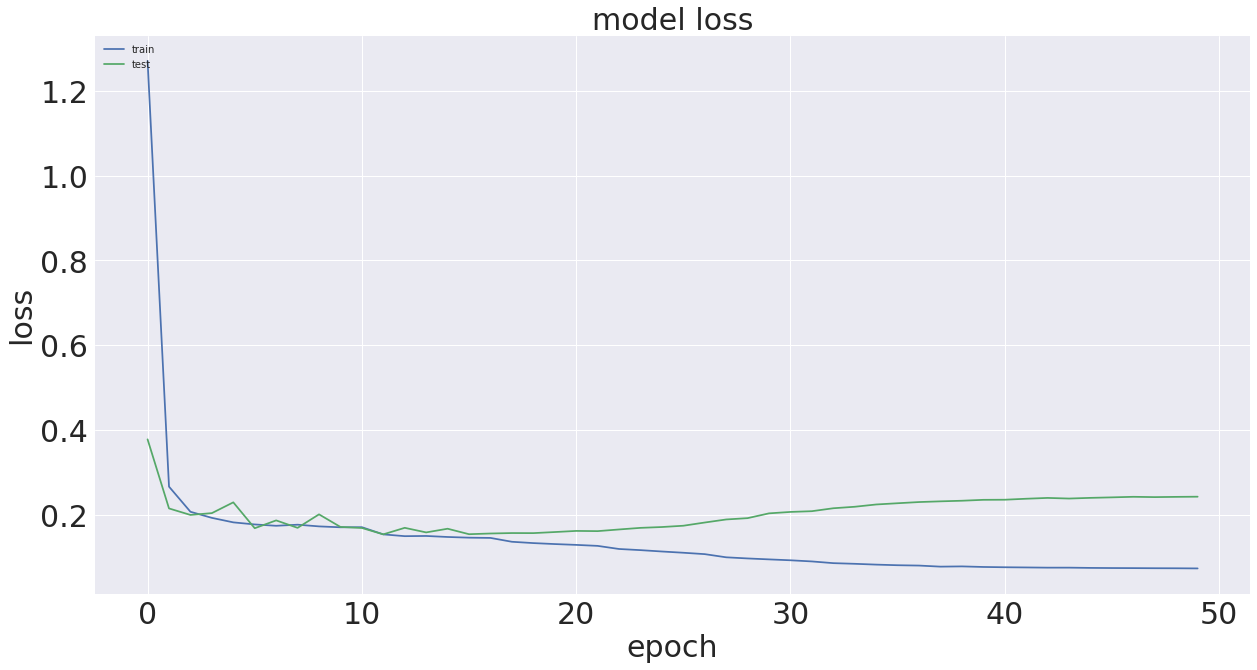

In [181]:
# list all data in history
print(history_resnet_50.history.keys())
# summarize history for accuracy
plt.plot(history_resnet_50.history['acc'])
plt.plot(history_resnet_50.history['val_acc'])
plt.title('model accuracy',fontsize=30)
plt.ylabel('accuracy',fontsize=30)
plt.xlabel('epoch',fontsize=30)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_resnet_50.history['loss'])
plt.plot(history_resnet_50.history['val_loss'])
plt.title('model loss',fontsize=30)
plt.ylabel('loss',fontsize=30)
plt.xlabel('epoch',fontsize=30)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [126]:
#profile resnet 50 and visualize results
from util import profile
# analyze FLOPS
layer_name, layer_flops, inshape, weights = profile(resnet_model_50)
# visualize results
for name, flop, shape, weight in zip(layer_name, layer_flops, inshape, weights):
    print("layer:", name, shape, " MegaFLOPS:", flop/1e6, " MegaWeights:", weight/1e6)

layer: conv2d_54 (None, 1, 138, 1)  MegaFLOPS: 0.432832  MegaWeights: 0.0032
layer: conv2d_55 (None, 1, 35, 64)  MegaFLOPS: 0.286784  MegaWeights: 0.00416
layer: conv2d_56 (None, 1, 35, 64)  MegaFLOPS: 2.580544  MegaWeights: 0.036928
layer: conv2d_58 (None, 1, 35, 64)  MegaFLOPS: 1.147136  MegaWeights: 0.01664
layer: conv2d_57 (None, 1, 35, 64)  MegaFLOPS: 1.147136  MegaWeights: 0.01664
layer: conv2d_59 (None, 1, 35, 256)  MegaFLOPS: 1.146944  MegaWeights: 0.016448
layer: conv2d_60 (None, 1, 35, 64)  MegaFLOPS: 2.580544  MegaWeights: 0.036928
layer: conv2d_61 (None, 1, 35, 64)  MegaFLOPS: 1.147136  MegaWeights: 0.01664
layer: conv2d_62 (None, 1, 35, 256)  MegaFLOPS: 1.146944  MegaWeights: 0.016448
layer: conv2d_63 (None, 1, 35, 64)  MegaFLOPS: 2.580544  MegaWeights: 0.036928
layer: conv2d_64 (None, 1, 35, 64)  MegaFLOPS: 1.147136  MegaWeights: 0.01664
layer: conv2d_65 (None, 1, 35, 256)  MegaFLOPS: 1.179776  MegaWeights: 0.032896
layer: conv2d_66 (None, 1, 18, 128)  MegaFLOPS: 5.308544